In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
import re

In [6]:
yte = pd.read_csv("y_te_metric.csv")

In [7]:
non_province = ['CẢ NƯỚC', 'Đồng bằng sông Hồng', 
                'Hà Tây', 'Trung du và miền núi phía Bắc', 
                'Bắc Trung Bộ và duyên hải miền Trung',
                'Tây Nguyên', 'Đông Nam Bộ', 'Đồng bằng sông Cửu Long']              
non_province_preprocessed = ['ca nuoc',
            'dong bang song hong',
            'ha tay',
            'trung du va mien nui phia bac',
            'bac trung bo va duyen hai mien trung',
            'tay nguyen',
            'dong nam bo',
            'dong bang song cuu long']

            
cluster_province = {
    'DBSH': ["Hà Nội", "Vĩnh Phúc","Bắc Ninh","Quảng Ninh","Hải Dương","Hải Phòng","Hưng Yên","Thái Bình","Hà Nam","Nam Định","Ninh Bình"],
    'TDMNPB': ["Hà Giang","Cao Bằng","Bắc Kạn","Tuyên Quang","Lào Cai","Yên Bái","Thái Nguyên","Lạng Sơn","Bắc Giang","Phú Thọ","Điện Biên","Lai Châu","Sơn La","Hòa Bình"],
    'BTBDHMT': ["Thanh Hóa", "Nghệ An", "Hà Tĩnh", "Quảng Bình", "Quảng Trị", "Thừa Thiên - Huế", "Đà Nẵng", "Quảng Nam", "Quảng Ngãi", "Bình Định", "Phú Yên", "Khánh Hòa", "Ninh Thuận", "Bình Thuận"],
    'TN': ["Kon Tum","Gia Lai","Đắk Lắk","Đắk Nông","Lâm Đồng"],
    'DNB': ["Bình Phước","Tây Ninh","Bình Dương","Đồng Nai","Bà Rịa - Vũng Tàu","TP. Hồ Chí Minh"],
    'DBSCL': ["Long An","Tiền Giang","Bến Tre","Trà Vinh","Vĩnh Long","Đồng Tháp","An Giang","Kiên Giang","Cần Thơ","Hậu Giang","Sóc Trăng","Bạc Liêu","Cà Mau"]
}
cluster_province_preprocessed = {
        'DBSH': ['ha noi','vinh phuc','bac ninh','quang ninh','hai duong','hai phong','hung yen','thai binh','ha nam','nam dinh','ninh binh'],
        'TDMNPB': ['ha giang','cao bang','bac kan','tuyen quang','lao cai','yen bai','thai nguyen','lang son','bac giang','phu tho','dien bien','lai chau','son la','hoa binh'],
        'BTBDHMT': ['thanh hoa','nghe an','ha tinh','quang binh','quang tri','thua thien hue','da nang','quang nam','quang ngai','binh dinh','phu yen','khanh hoa','ninh thuan','binh thuan'],
        'TN': ['kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong'],
        'DNB': ['binh phuoc','tay ninh','binh duong','dong nai','ba ria vung tau','tp.ho chi minh'],
        'DBSCL': ['long an','tien giang','ben tre','tra vinh','vinh long','dong thap','an giang','kien giang','can tho','hau giang','soc trang','bac lieu','ca mau']
        }


vung_mien_name = ['Đồng bằng sông Hồng', 
             'Trung du và miền núi phía Bắc', 
             'Bắc Trung Bộ và duyên hải miền Trung',
             'Tây Nguyên', 'Đông Nam Bộ', 'Đồng bằng sông Cửu Long']
vung_mien_name_preprocessed = ['dong bang song hong',
            'trung du va mien nui phia bac',
            'bac trung bo va duyen hai mien trung',
            'tay nguyen',
            'dong nam bo',
            'dong bang song cuu long']


province_name = ['Hà Nội', 'Vĩnh Phúc', 'Bắc Ninh', 'Quảng Ninh', 'Hải Dương',
       'Hải Phòng', 'Hưng Yên', 'Thái Bình', 'Hà Nam', 'Nam Định',
       'Ninh Bình', 'Hà Giang', 'Cao Bằng', 'Bắc Kạn', 'Tuyên Quang',
       'Lào Cai', 'Yên Bái', 'Thái Nguyên', 'Lạng Sơn', 'Bắc Giang',
       'Phú Thọ', 'Điện Biên', 'Lai Châu', 'Sơn La', 'Hòa Bình',
       'Thanh Hóa', 'Nghệ An', 'Hà Tĩnh', 'Quảng Bình', 'Quảng Trị',
       'Thừa Thiên Huế', 'Đà Nẵng', 'Quảng Nam', 'Quảng Ngãi',
       'Bình Định', 'Phú Yên', 'Khánh Hòa', 'Ninh Thuận', 'Bình Thuận',
       'Kon Tum', 'Gia Lai', 'Đắk Lắk', 'Đắk Nông', 'Lâm Đồng',
       'Bình Phước', 'Tây Ninh', 'Bình Dương', 'Đồng Nai',
       'Bà Rịa - Vũng Tàu', 'TP.Hồ Chí Minh', 'Long An', 'Tiền Giang',
       'Bến Tre', 'Trà Vinh', 'Vĩnh Long', 'Đồng Tháp', 'An Giang',
       'Kiên Giang', 'Cần Thơ', 'Hậu Giang', 'Sóc Trăng', 'Bạc Liêu',
       'Cà Mau']
province_name_preprocessed = ['ha noi','vinh phuc','bac ninh','quang ninh','hai duong',
        'hai phong','hung yen','thai binh','ha nam','nam dinh','ninh binh','ha giang',
        'cao bang','bac kan','tuyen quang','lao cai','yen bai','thai nguyen','lang son',
        'bac giang','phu tho','dien bien','lai chau','son la','hoa binh','thanh hoa','nghe an',
        'ha tinh','quang binh','quang tri','thua thien hue','da nang','quang nam','quang ngai',
        'binh dinh','phu yen','khanh hoa','ninh thuan','binh thuan','kon tum','gia lai','dak lak',
        'dak nong','lam dong','binh phuoc','tay ninh','binh duong','dong nai','ba ria vung tau',
        'tp.ho chi minh','long an','tien giang','ben tre','tra vinh','vinh long','dong thap',
        'an giang','kien giang','can tho','hau giang','soc trang','bac lieu','ca mau']


years = yte.columns[3:]

In [8]:
def clean_province(province):
    cleaned = re.sub(r'[-\s]+', ' ', province).strip()
    return cleaned

def preprocess_list(lst):
    lst = [unidecode(i).lower().strip() for i in lst]
    lst = [clean_province(i) for i in lst]
    return lst

## find cluster with province
def find_cluster(province):
    for key, value in cluster_province_preprocessed.items():
        if province in value:
            return key
        

# def preprocess_df(df, feature, vung_mien_name, province_name):
#     df = df[df.Main_Feature == feature]
#     lst_vm_p = vung_mien_name + province_name
#     lst_vm_p = [unidecode(i).lower().strip() for i in lst_vm_p]
#     lst_vm_p = [clean_province(i) for i in lst_vm_p]
#     df['Province'] = df['Province'].apply(lambda x: clean_province(x))
#     df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
#     df['Province'] = df['Province'].str.replace('tp. ho chi minh', 'tp.ho chi minh')
#     df = df[df.Province.isin(lst_vm_p)]
#     years = df.columns[3:]
#     # df[years] = df[years].replace(',', '.', regex=True)
#     df.loc[:, years] = df[years].apply(pd.to_numeric, errors='coerce', downcast='float')
#     df.drop_duplicates(inplace=True)
#     return df

def preprocess_df(df, feature, vung_mien_name, province_name):
    df = df[df.Main_Feature == feature]
    lst_vm_p = vung_mien_name + province_name
    lst_vm_p = [unidecode(i).lower().strip() for i in lst_vm_p]
    lst_vm_p = [clean_province(i) for i in lst_vm_p]
    df['Province'] = df['Province'].apply(lambda x: clean_province(x))
    df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
    df['Province'] = df['Province'].str.replace('tp. ho chi minh', 'tp.ho chi minh')
    # print(df.Province.tolist())
    df['Province'] = df['Province'].str.replace("nam dinh\(\*\)", 'nam dinh')
    # df[df.Province == 'nam dinh(*)']['Province'] = 'nam dinh'
    df = df[df.Province.isin(lst_vm_p)]
    years = df.columns[3:]
    
    for year in years:
        df[year] = df[year].astype(str)
        if df[year].str.contains(',').any() and not df[year].str.contains('\.').any():
            # only contains ','
            df[year] = df[year].str.replace(',', '.', regex=True)
        elif df[year].str.contains(',').any() and df[year].str.contains('\.').any():
            # contains both ',' and '.'
            df[year] = df[year].str.replace('\.', '', regex=True).str.replace(',', '.', regex=True)
        df[year] = pd.to_numeric(df[year], errors='coerce')
    # df.loc[:, years] = df[years].apply(pd.to_numeric, errors='coerce')
    df.drop_duplicates(inplace=True)
    return df


def line_plot(df, sub_feature, years):
    plt.figure(figsize=(20, 10))
    if sub_feature is None:
        value = df[years]
        province = df.Province
    else:
        value = df[df.Sub_Feature == sub_feature][years]
        province = df[df.Sub_Feature == sub_feature].Province
    plt.plot(province, value)
    ## rorate xlabel
    plt.legend(years)
    plt.xticks(rotation=90)


def describe_(df, sub_feature, years):
    col = years + ['Province']
    if sub_feature is None:
        return df[col].describe()
    else:
        return df[df.Sub_Feature == sub_feature][col].describe()

def province_with_max_value(df, sub_feature, years):
    if sub_feature is None:
        ids = df[years].idxmax()
    else:
        ids = df[df.Sub_Feature == sub_feature][years].idxmax()
    province = df.Province[ids]
    cluster = [find_cluster(p) for p in province]
    ## print year with province
    for i in range(len(years)):
        print(years[i], province.iloc[i], cluster[i])
    # return province


def top_k_province_best_sub_feature(df, sub_feature, years, topk=5):
    for year in years:
        i = 0
        if sub_feature is None:
            top_k = df[year].sort_values(ascending=False).head(topk)
        else:
            top_k = df[df.Sub_Feature == sub_feature][year].sort_values(ascending=False).head(topk)
        provinces = df.loc[top_k.index, 'Province']
        cluster = [find_cluster(p) for p in provinces]
        print(f"{year}:")
        for province, value in zip(provinces, top_k):
            print(f"{province}, {cluster[i]}: {value}")
            i +=1
        print('-'*30)

def stacked_bar_plot(df, sub_feature, years, title):
    plt.figure(figsize=(20, 10))
    if sub_feature is None:
        value = df[years]
        value.index = df.Province
    else:
        value = df[df.Sub_Feature == sub_feature][years]
        value.index = df[df.Sub_Feature == sub_feature].Province
    value.plot(kind='bar', stacked=True, figsize=(20,8))
    ## rorate xlabel
    plt.xlabel("")
    plt.title(title)
    plt.xticks(rotation=90);

def pannel_bar_plot(df, show_value, sub_feature, years, title):
    fig, axs = plt.subplots(1, len(years), figsize=(15, 10), sharex=True, sharey=True)
    colors = sns.color_palette('husl', len(years))
    one_year = True if len(years) == 1 else False
    for i, year in enumerate(years):
        if sub_feature is None:
            value = df[year]
            value.index = df.Province
            
        else:
            value = df[df.Sub_Feature == sub_feature][year]
            value.index = df[df.Sub_Feature == sub_feature].Province

        value = value[::-1]
        if one_year:
            bars = value.plot(kind='barh', stacked=True, ax=axs, color=colors[i])
            axs.set_ylabel("")
            axs.set_title(f"{year}")
            axs.grid(False)
            # if i != 0:  # Add vertical line to separate years
            #     axs[i].axvline(x=0, color='k', linestyle='-')
            # Remove spines
            for spine in ["left", "right", "top", "bottom"]:
                axs.spines[spine].set_visible(False)

            axs.tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
            break
        else:
            bars = value.plot(kind='barh', stacked=True, ax=axs[i], color=colors[i])
            axs[i].set_ylabel("")
            axs[i].set_title(f"{year}")
            axs[i].grid(False)
            # if i != 0:  # Add vertical line to separate years
            #     axs[i].axvline(x=0, color='k', linestyle='-')
            # Remove spines
            for spine in ["left", "right", "top", "bottom"]:
                axs[i].spines[spine].set_visible(False)

            axs[i].tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')

    plt.suptitle(title, fontsize=11)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def average_describe(df, is_Province, sub_feature, years):
    if is_Province:
        df = df[df.Province.isin(province_name_preprocessed)]
    else:
        df = df[df.Province.isin(vung_mien_name_preprocessed)]
    if sub_feature is not None:
        min_value = df[df.Sub_Feature == sub_feature][years].mean(axis=1).idxmin()
        max_value = df[df.Sub_Feature == sub_feature][years].mean(axis=1).idxmax()
        print(df[df.Sub_Feature == sub_feature][years].mean(axis=1).describe())
        print(df.loc[min_value].Province, df.loc[max_value].Province)
    else:
        min_value = df[years].mean(axis=1).idxmin()
        max_value = df[years].mean(axis=1).idxmax()
        print(df[years].mean(axis=1).describe())
        print(df.loc[min_value].Province, " | ", df.loc[max_value].Province)


def report(df, sub_feature, years, title):
    pannel_bar_plot(df[df.Province.isin(province_name_preprocessed)], False, sub_feature, years, title)
    pannel_bar_plot(df[df.Province.isin(vung_mien_name_preprocessed)], True, sub_feature, years, title)
    print(describe_(df[df.Province.isin(province_name_preprocessed)], sub_feature, years))
    print(describe_(df[df.Province.isin(vung_mien_name_preprocessed)], sub_feature, years))
    # province_with_max_value(df[df.Province.isin(province_name_preprocessed)], sub_feature, years)
    top_k_province_best_sub_feature(df[df.Province.isin(province_name_preprocessed)], sub_feature, years)
    average_describe(df, True, sub_feature, years)
    average_describe(df, False, sub_feature, years)

In [34]:
import math
def box_plot(dfs, years_list):
    n = len(dfs)
    ncols = int(math.sqrt(n))
    nrows = n // ncols + (n % ncols > 0)

    fig, axs = plt.subplots(nrows, ncols, figsize=(20, 20))
    axs = axs.flatten()  # to handle the case when n is not a perfect square
    sns.set_style('whitegrid')
    
    for i, df in enumerate(dfs):
        dfs = [df[df.Province.isin(province_name_preprocessed)] for df in dfs]
        #print(max([df.Province.nunique() for df in dfs]))
        valid_years = [year for year in years_list if year in df.columns]
        if df.Sub_Feature.nunique() == 0:
            value = df[valid_years]
            sns.boxplot(data=value, ax=axs[i], orient='h')
            sns.stripplot(data=value, ax=axs[i], orient='h')
            sns.despine(offset=10, trim=True, ax=axs[i]);
        else:
            col = ['Sub_Feature']
            col.extend(valid_years)
            value = df[col]
            value = pd.melt(value, id_vars='Sub_Feature', var_name='Year', value_name='Value')
            # value.Year = value.Year.astype('category')

            # year_order = ['2018', '2019', '2020', '2021', 'Sơ bộ 2021', '2022', 'Sơ bộ 2022']
            sns.boxplot(x='Value', y='Year', hue='Sub_Feature', data=value, ax=axs[i], orient='h')
            axs[i].legend(loc='upper right')
            sns.despine(offset=10, trim=True, ax=axs[i]);
        title = 'Feature_' + str(i)
        axs[i].set_title(title)
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [30]:
years = ['2018', '2019', '2020', '2021','2022','Sơ bộ 2021', 'Sơ bộ 2022']

In [37]:
import pickle
lst_df = [tschet_1tuoi,tltds,tltred05khaisinh,tongtssinh,tuoitho,tschet_duoi5,tlkid_duoi1_tiemchung,tlkid_duoi5_suydinhduong,sobacsi,hivaids,giuongbenh]
with open('yte_dfs.pkl', 'wb') as f:
    pickle.dump(lst_df, f)

In [39]:
lst_name = [df.Main_Feature.unique()[0] for df in lst_df]
lst_name

['Tỷ suất chết của trẻ em dưới 1 tuổi phân theo địa phương chia theo Địa phương và Năm',
 'Tỷ lệ tăng dân số phân theo địa phương chia theo Tỉnh-Thành phố và Năm',
 'Tỷ lệ trẻ em dưới 05 tuổi được đăng ký khai sinh phân theo địa phương chia theo Tỉnh-Thành phố và Năm',
 'Tổng tỷ suất sinh phân theo địa phương chia theo Địa phương và Năm',
 'Tuổi thọ trung bình tính từ lúc sinh phân theo địa phương chia theo Tỉnh-Thành phố và Năm',
 'Tỷ suất chết của trẻ em dưới 5 tuổi phân theo địa phương chia theo Tỉnh-Thành phố và Năm',
 'Tỷ lệ trẻ em dưới một tuổi được tiêm chủng đầy đủ các loại vắc xin phân theo địa phương chia theo Địa phương và Năm',
 'Tỷ lệ trẻ em dưới 5 tuổi bị suy dinh dưỡng phân theo địa phương chia theo Địa phương, Năm và Phân tổ',
 'Số bác sĩ phân theo địa phương',
 'Số người nhiễm HIVAIDS

## EDA

1. Bỏ: 1,7,9, 12, 15, 16, 2
2. Cần sửa đổi:3, 12

In [9]:
features = yte.Main_Feature.unique()
print(len(features))
# features

17


In [10]:
def init_df(df, feature, vung_mien_name,province_name):
    new_df = preprocess_df(df, feature, vung_mien_name, province_name)
    print(new_df.Province.nunique())
    print(new_df.Sub_Feature.unique())
    print(new_df[years].isnull().sum())
    return new_df

In [11]:
def extract_feature(df, sub_feature, years):
    if sub_feature is not None:
        return df[(df.Province.isin(province_name_preprocessed)) & (df.Sub_Feature == sub_feature)][years].values
    else:
        return df[df.Province.isin(province_name_preprocessed)][years].values

In [13]:
years_model = ['2018', '2019', '2020', '2021']
years = ['2018', '2019', '2020', '2021', 'Sơ bộ 2021', 'Sơ bộ 2022']

### Tỷ suất chết của trẻ em dưới 1 tuổi phân theo địa phương chia theo địa phương và năm

In [14]:
tschet_1tuoi = init_df(yte.copy(), features[0], vung_mien_name, province_name)

69
[nan]
2018           0
2019           0
2020           0
2021           0
Sơ bộ 2021    69
Sơ bộ 2022     0
dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:39: FutureWarning: The default value of regex will change from True to False in a futu

In [64]:
sc_0 = extract_feature(tschet_1tuoi, None, years)
sc_0.shape

(63, 6)

In [12]:
sc_0_model = extract_feature(tschet_1tuoi, None, years_model)
sc_0_model.shape

(63, 4)

In [ ]:
lst = [sc_0_model, ]

In [13]:
sc_0_model

array([[ 9.8 ,  9.6 ,  9.1 ,  9.22],
       [12.4 , 12.2 , 12.95, 12.1 ],
       [12.3 , 12.2 , 12.83, 12.33],
       [14.5 , 14.3 , 14.4 , 14.25],
       [11.3 , 11.1 , 10.99, 10.97],
       [11.5 , 11.4 , 11.66, 11.35],
       [11.8 , 11.6 , 11.3 , 11.39],
       [ 9.9 ,  9.7 , 10.8 ,  9.74],
       [11.6 , 11.4 , 11.29, 11.31],
       [12.1 , 11.9 , 11.65, 11.82],
       [13.8 , 13.6 , 12.55, 12.36],
       [32.3 , 31.8 , 29.86, 28.46],
       [23.  , 22.6 , 22.66, 20.14],
       [16.9 , 16.6 , 16.68, 16.66],
       [17.9 , 17.6 , 17.49, 17.76],
       [27.7 , 27.2 , 26.82, 24.55],
       [25.9 , 25.5 , 25.83, 25.52],
       [14.2 , 13.9 , 13.75, 13.69],
       [17.6 , 17.3 , 17.1 , 17.03],
       [14.7 , 14.5 , 14.35, 14.44],
       [14.5 , 14.2 , 14.39, 14.15],
       [32.5 , 31.9 , 29.7 , 29.7 ],
       [40.2 , 39.6 , 36.19, 31.7 ],
       [22.  , 21.6 , 21.4 , 21.45],
       [16.7 , 16.5 , 16.62, 16.38],
       [14.9 , 14.6 , 14.44, 14.41],
       [16.2 , 15.9 , 15.32, 15.17],
 

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

def box_plot(dfs, years_list):
    n = len(dfs)
    ncols = int(math.sqrt(n))
    nrows = n // ncols + (n % ncols > 0)

    fig, axs = plt.subplots(nrows, ncols, figsize=(20, 20))
    axs = axs.flatten()  # to handle the case when n is not a perfect square

    for i, df in enumerate(dfs):
        valid_years = [year for year in years_list if year in df.columns]
        if df.Sub_Feature.nunique() == 0:
            value = df[valid_years]
            sns.boxplot(data=value, ax=axs[i])
        else:
            col = ['Sub_Feature']
            col.extend(valid_years)
            value = pd.melt(df[col], id_vars='Sub_Feature', var_name='Year', value_name='Value')
            sns.boxplot(x='Year', y='Value', hue='Sub_Feature', data=value, ax=axs[i])
        title = 'Feature_' + str(i)
        axs[i].set_title(title)
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [129]:
lst_df = [tlkid_duoi1_tiemchung,tlkid_duoi5_suydinhduong,tltds,tltred05khaisinh,tongtssinh,tschet_1tuoi,tschet_duoi5,tuoitho,sobacsi,hivaids,giuongbenh]

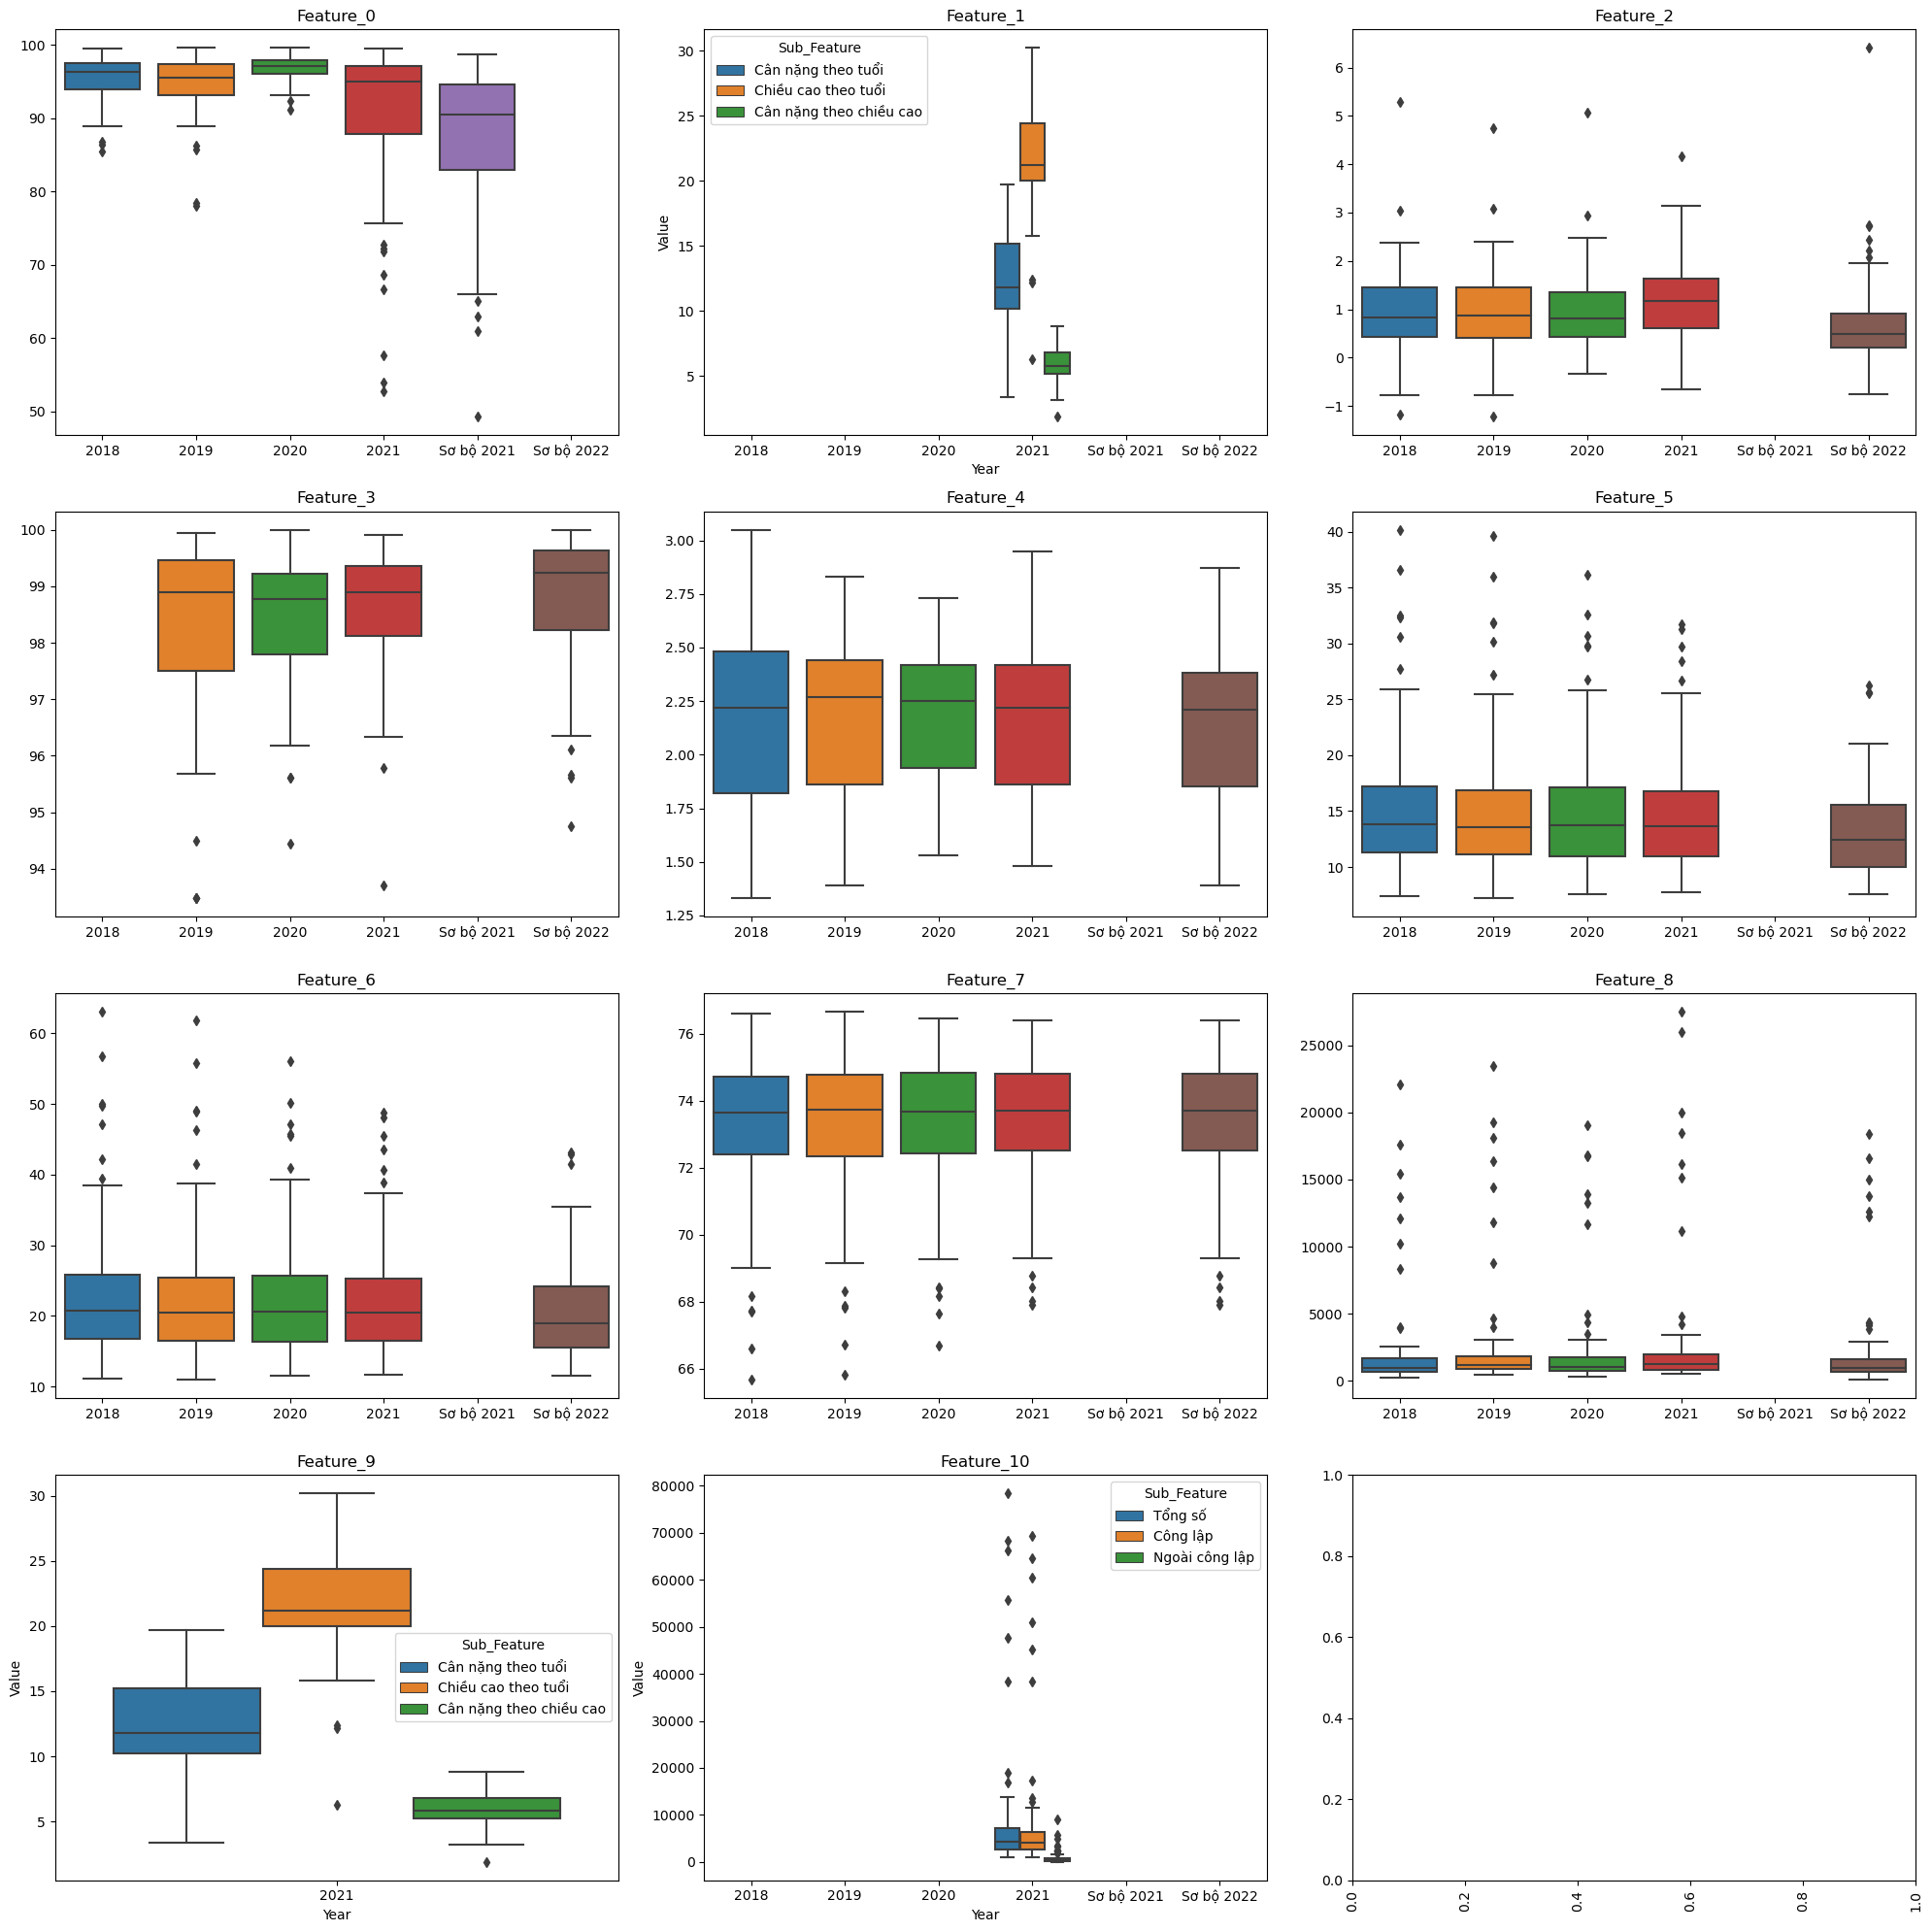

In [136]:
box_plot_v4(lst_df, ['2018', '2019', '2020', '2021', 'Sơ bộ 2021', 'Sơ bộ 2022'])

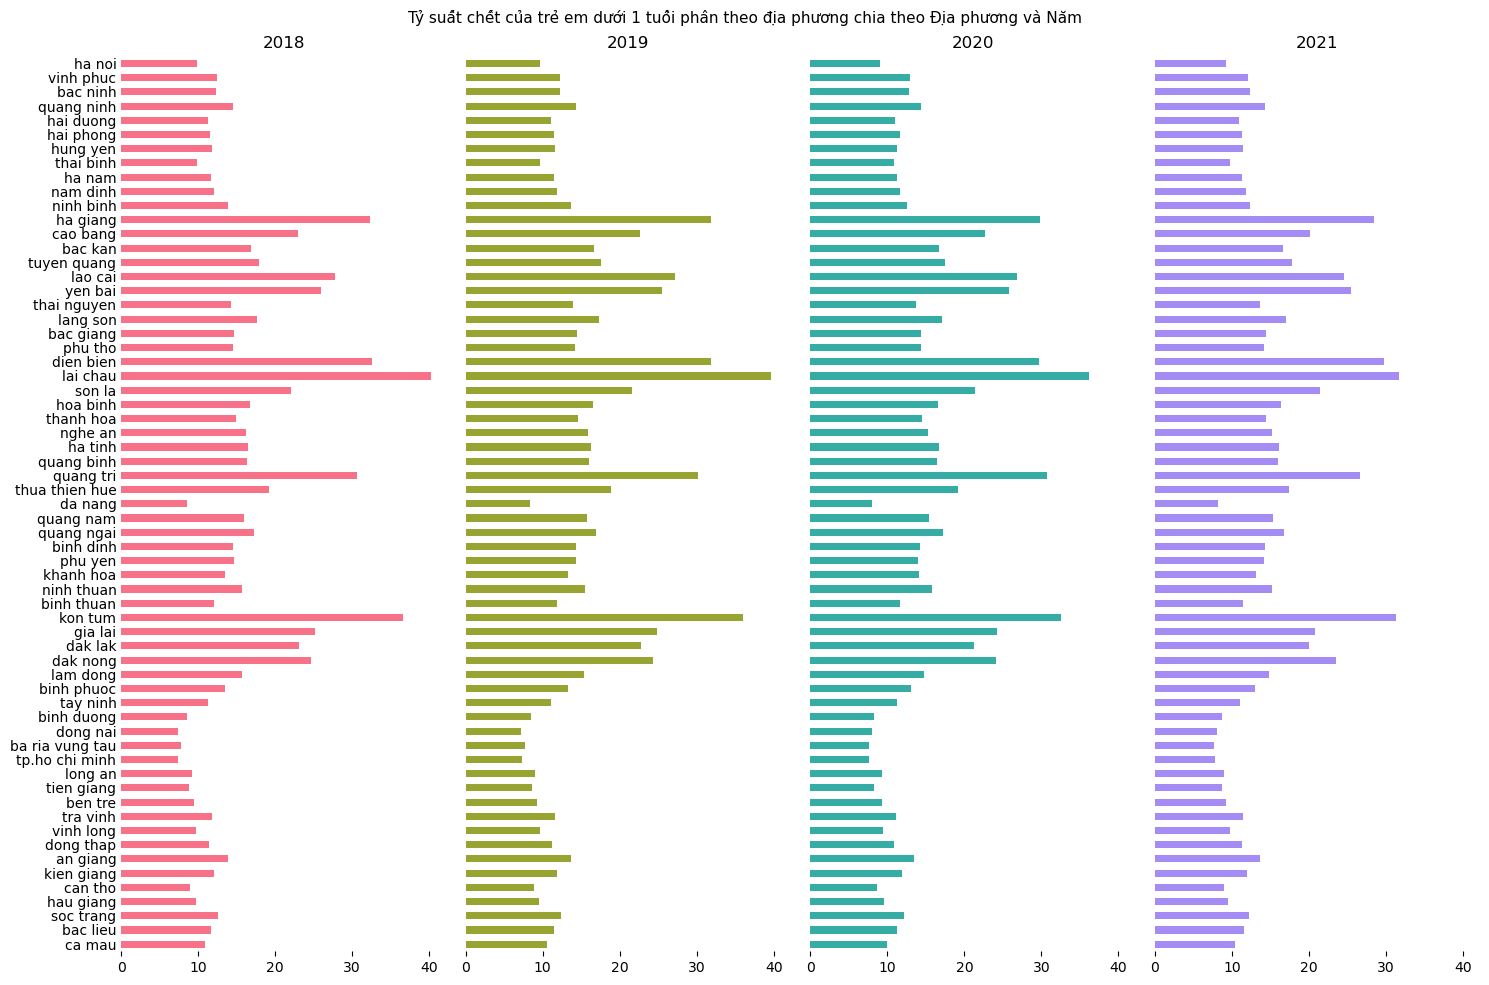

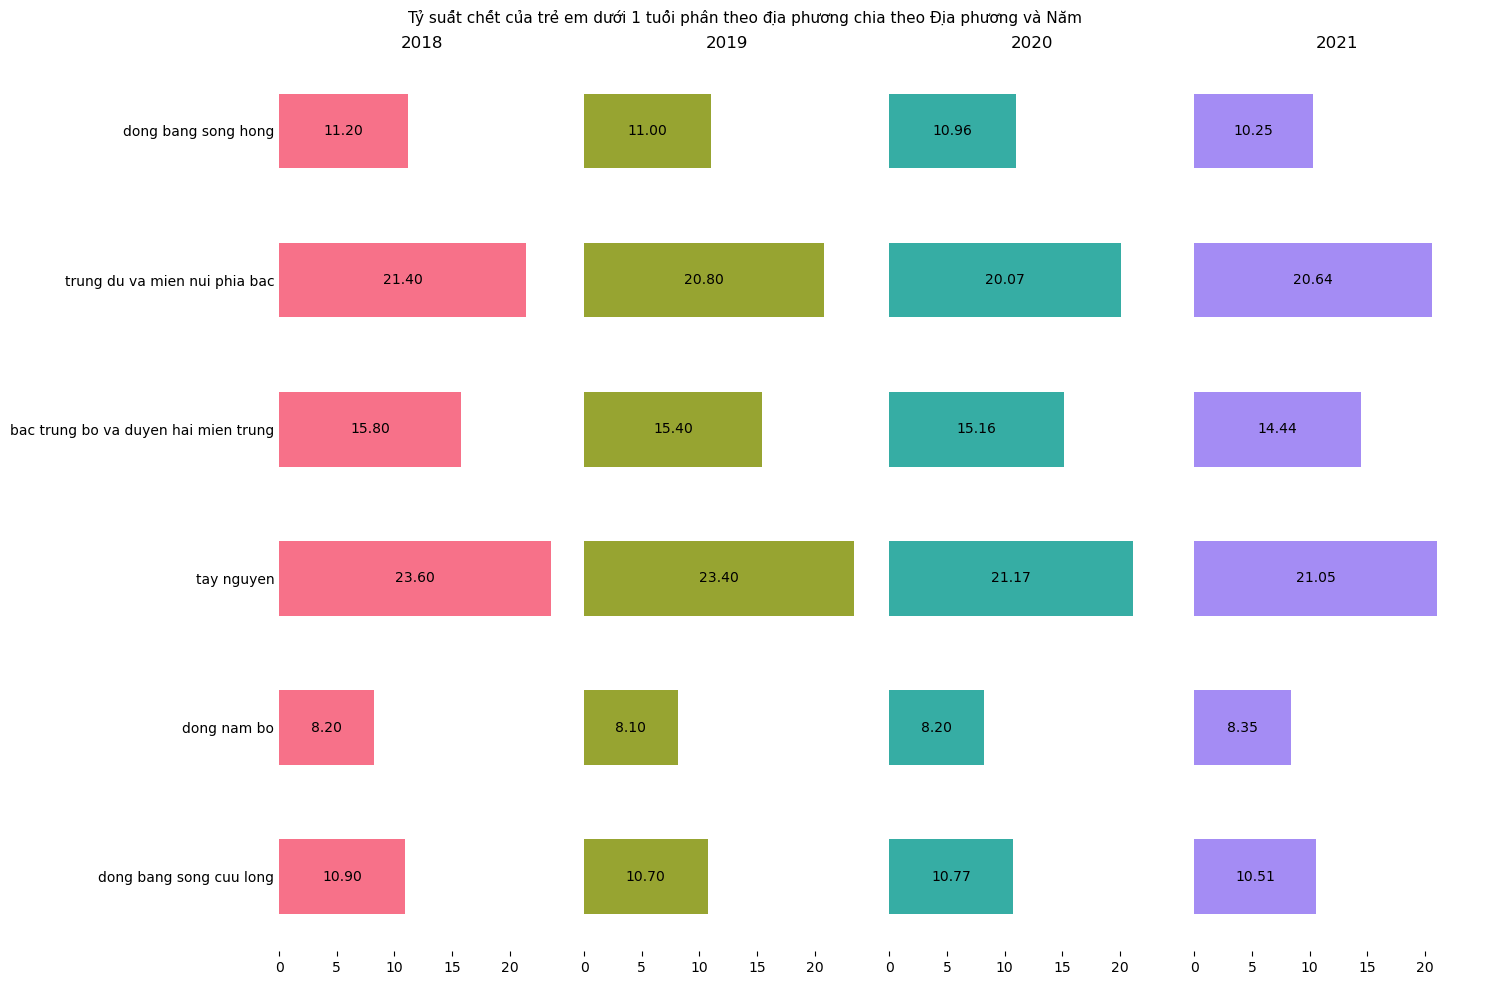

            2018       2019       2020       2021
count  63.000000  63.000000  63.000000  63.000000
mean   15.780952  15.517460  15.293651  14.868254
std     7.281525   7.168492   6.682342   5.983449
min     7.400000   7.200000   7.590000   7.720000
25%    11.350000  11.150000  11.060000  11.155000
50%    13.800000  13.600000  13.750000  13.670000
75%    17.050000  16.750000  16.890000  16.735000
max    40.200000  39.600000  36.190000  31.700000
            2018       2019       2020       2021
count   6.000000   6.000000   6.000000   6.000000
mean   15.183333  14.900000  14.388333  14.206667
std     6.210448   6.105735   5.329335   5.511706
min     8.200000   8.100000   8.200000   8.350000
25%    10.975000  10.775000  10.817500  10.315000
50%    13.500000  13.200000  13.060000  12.475000
75%    20.000000  19.450000  18.842500  19.090000
max    23.600000  23.400000  21.170000  21.050000
2018:
lai chau, TDMNPB: 40.2
kon tum, TN: 36.6
dien bien, TDMNPB: 32.5
ha giang, TDMNPB: 32.3
quang 

In [10]:
report(tschet_1tuoi, None, ['2018', '2019', '2020', '2021'], features[0])

### Tỷ lệ tăng dân số phân theo địa phương chia theo Tỉnh-Thành phố và Năm

In [15]:
tltds = init_df(yte.copy(), features[4], vung_mien_name, province_name)

69
[nan]
2018           0
2019           0
2020           0
2021           0
Sơ bộ 2021    69
Sơ bộ 2022     0
dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:39: FutureWarning: The default value of regex will change from True to False in a futu

In [66]:
sc_4 = extract_feature(tltds, None, years)
sc_4.shape

(63, 6)

In [135]:
sc_4_model = extract_feature(tltds, None, years_model)
sc_4_model.shape

(63, 4)

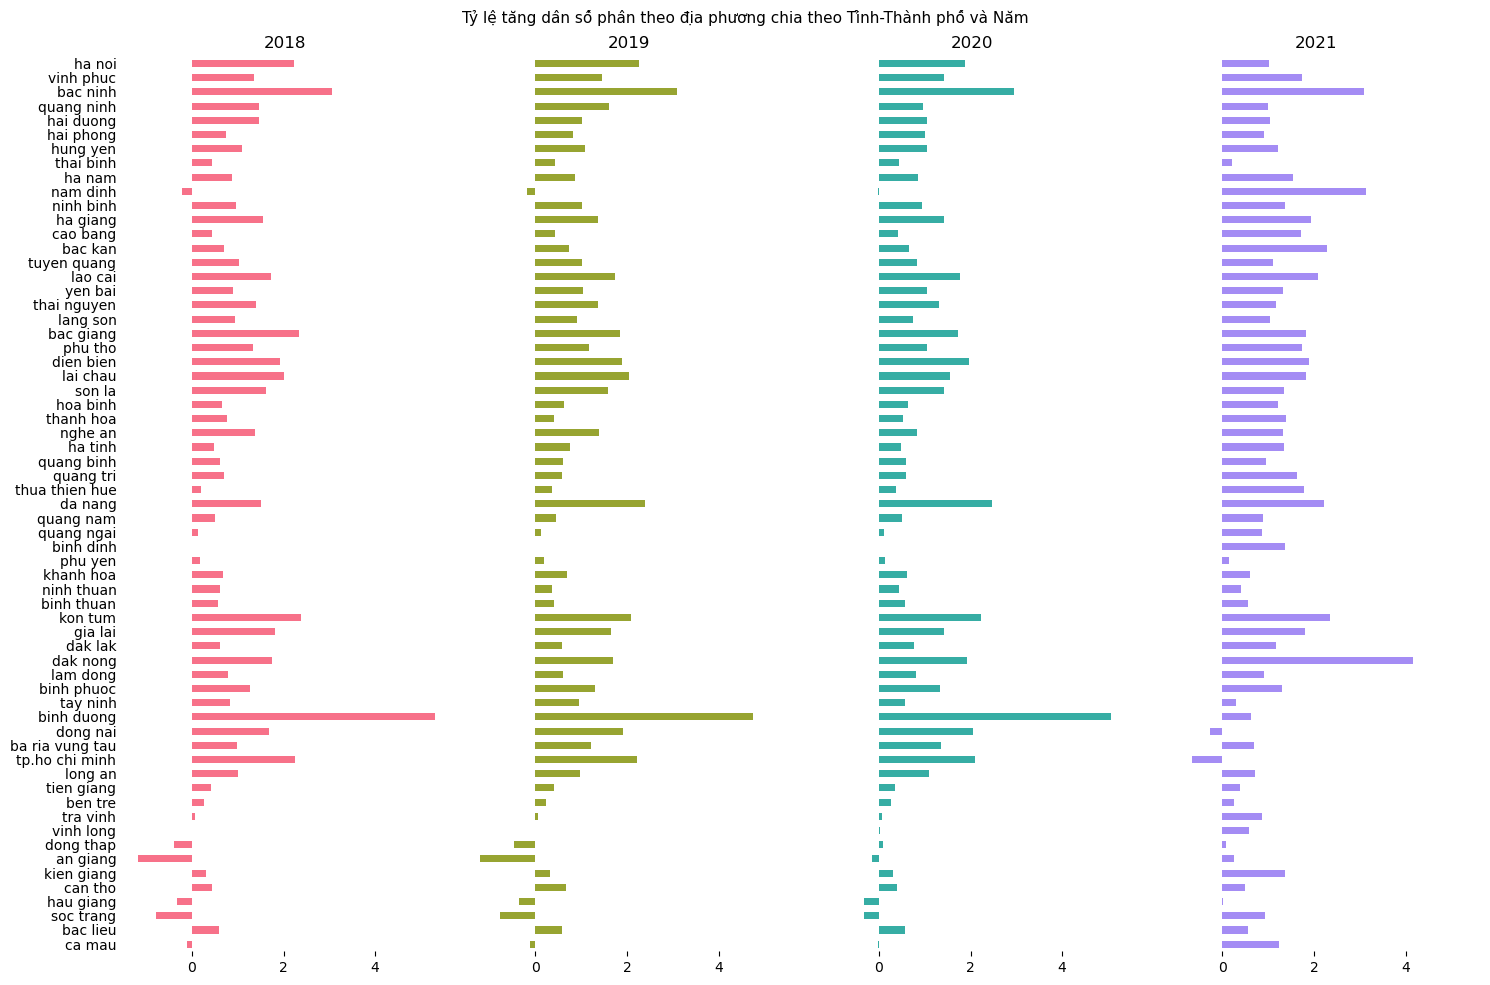

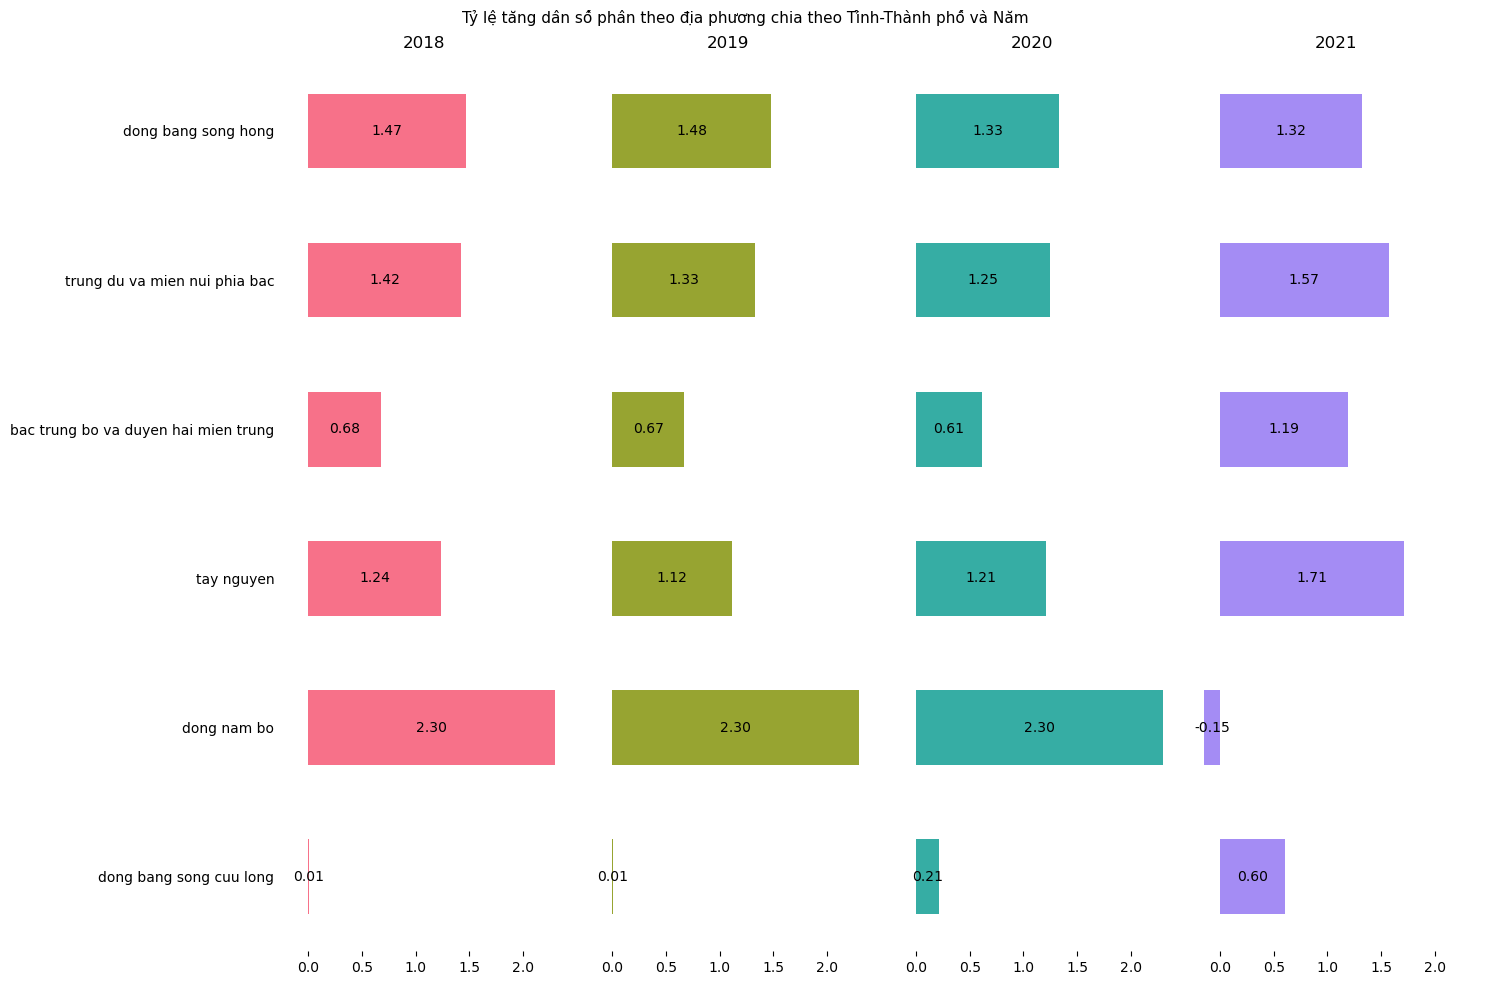

            2018       2019       2020       2021
count  63.000000  63.000000  63.000000  63.000000
mean    0.954762   0.939683   0.942063   1.182698
std     0.974866   0.941827   0.886232   0.824528
min    -1.180000  -1.220000  -0.330000  -0.660000
25%     0.430000   0.405000   0.405000   0.620000
50%     0.790000   0.830000   0.770000   1.170000
75%     1.460000   1.420000   1.390000   1.670000
max     5.300000   4.740000   5.060000   4.160000
           2018      2019      2020      2021
count  6.000000  6.000000  6.000000  6.000000
mean   1.186667  1.151667  1.151667  1.040000
std    0.776960  0.773910  0.713258  0.698627
min    0.010000  0.010000  0.210000 -0.150000
25%    0.820000  0.782500  0.760000  0.747500
50%    1.330000  1.225000  1.230000  1.255000
75%    1.457500  1.442500  1.310000  1.507500
max    2.300000  2.300000  2.300000  1.710000
2018:
binh duong, DNB: 5.3
bac ninh, DBSH: 3.05
kon tum, TN: 2.37
bac giang, TDMNPB: 2.34
tp.ho chi minh, DNB: 2.24
--------------------

In [12]:
report(tltds, None, ['2018', '2019', '2020', '2021'], features[4])

### Tỷ lệ trẻ em dưới 05 tuổi được đăng ký khai sinh phân theo địa phương chia theo Tỉnh-Thành phố và Năm

In [16]:
tltred05khaisinh = init_df(yte.copy(), features[5], vung_mien_name, province_name)

69
[nan]
2018          69
2019           0
2020           0
2021           0
Sơ bộ 2021    69
Sơ bộ 2022     0
dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:39: FutureWarning: The default value of regex will change from True to False in a futu

In [68]:
sc_5 = extract_feature(tltred05khaisinh, None, years)
sc_5.shape

(63, 6)

In [137]:
sc_5_model = extract_feature(tltred05khaisinh, None, years_model)
sc_5_model.shape

(63, 4)

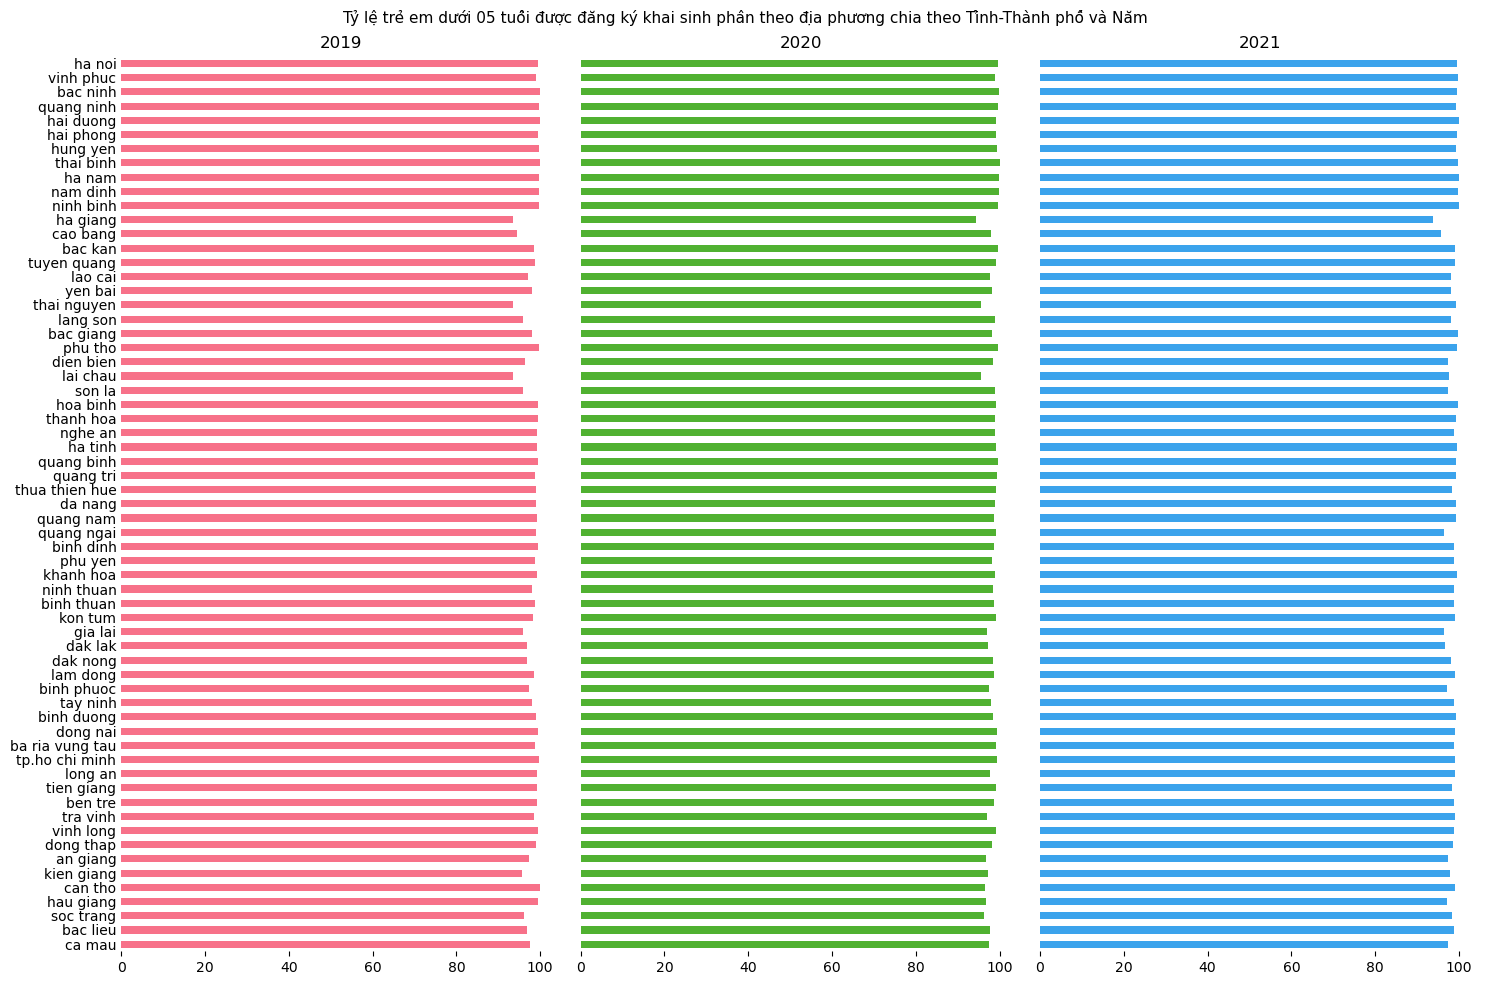

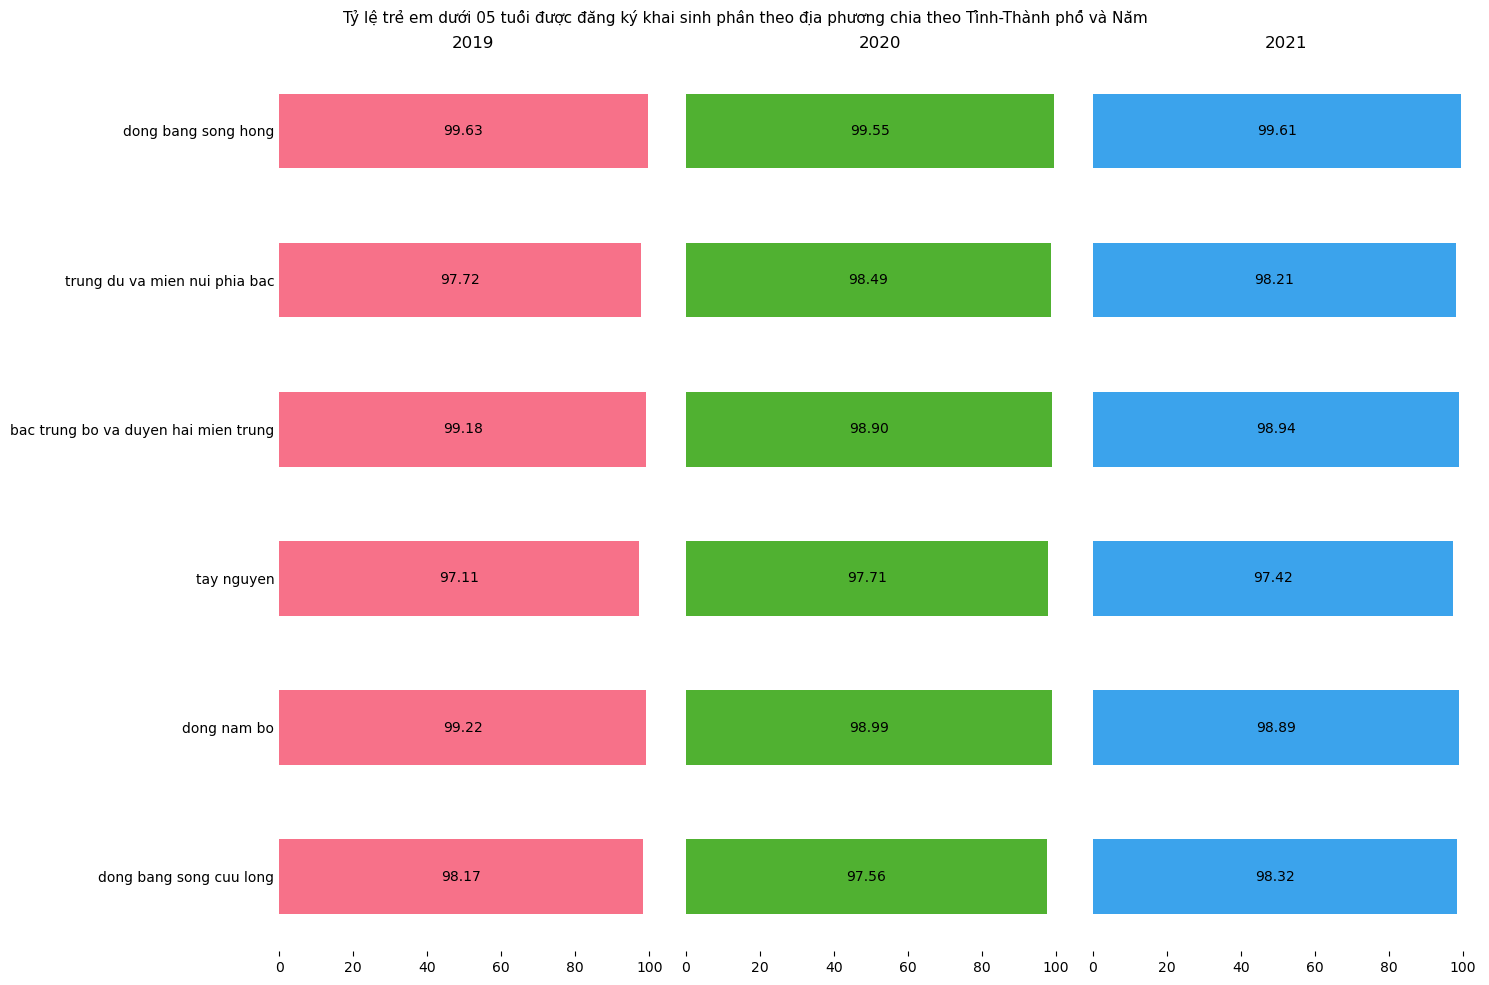

            2019        2020       2021
count  63.000000   63.000000  63.000000
mean   98.293810   98.423492  98.603016
std     1.671863    1.186470   1.150632
min    93.480000   94.440000  93.710000
25%    97.460000   97.820000  98.105000
50%    98.900000   98.780000  98.930000
75%    99.480000   99.220000  99.365000
max    99.940000  100.000000  99.910000
            2019       2020       2021
count   6.000000   6.000000   6.000000
mean   98.505000  98.533333  98.565000
std     0.990651   0.775078   0.753041
min    97.110000  97.560000  97.420000
25%    97.832500  97.905000  98.237500
50%    98.675000  98.695000  98.605000
75%    99.210000  98.967500  98.927500
max    99.630000  99.550000  99.610000
2019:
can tho, DBSCL: 99.94
bac ninh, DBSH: 99.86
hai duong, DBSH: 99.86
thai binh, DBSH: 99.85
quang ninh, DBSH: 99.82
------------------------------
2020:
thai binh, DBSH: 100.0
ha nam, DBSH: 99.92
nam dinh, DBSH: 99.9
bac ninh, DBSH: 99.8
phu tho, TDMNPB: 99.71
------------------------

In [15]:
report(tltred05khaisinh, None, ['2019', '2020', '2021'], features[5])

### Tổng tỷ suất sinh phân theo địa phương chia theo Địa phương và Năm

In [17]:
tongtssinh = init_df(yte.copy(), features[6], vung_mien_name, province_name)

69
[nan]
2018           0
2019           0
2020           0
2021           0
Sơ bộ 2021    69
Sơ bộ 2022     0
dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:39: FutureWarning: The default value of regex will change from True to False in a futu

In [70]:
sc_6 = extract_feature(tongtssinh, None, years)
sc_6.shape

(63, 6)

In [140]:
sc_6_model = extract_feature(tongtssinh, None, years_model)
sc_6_model.shape

(63, 4)

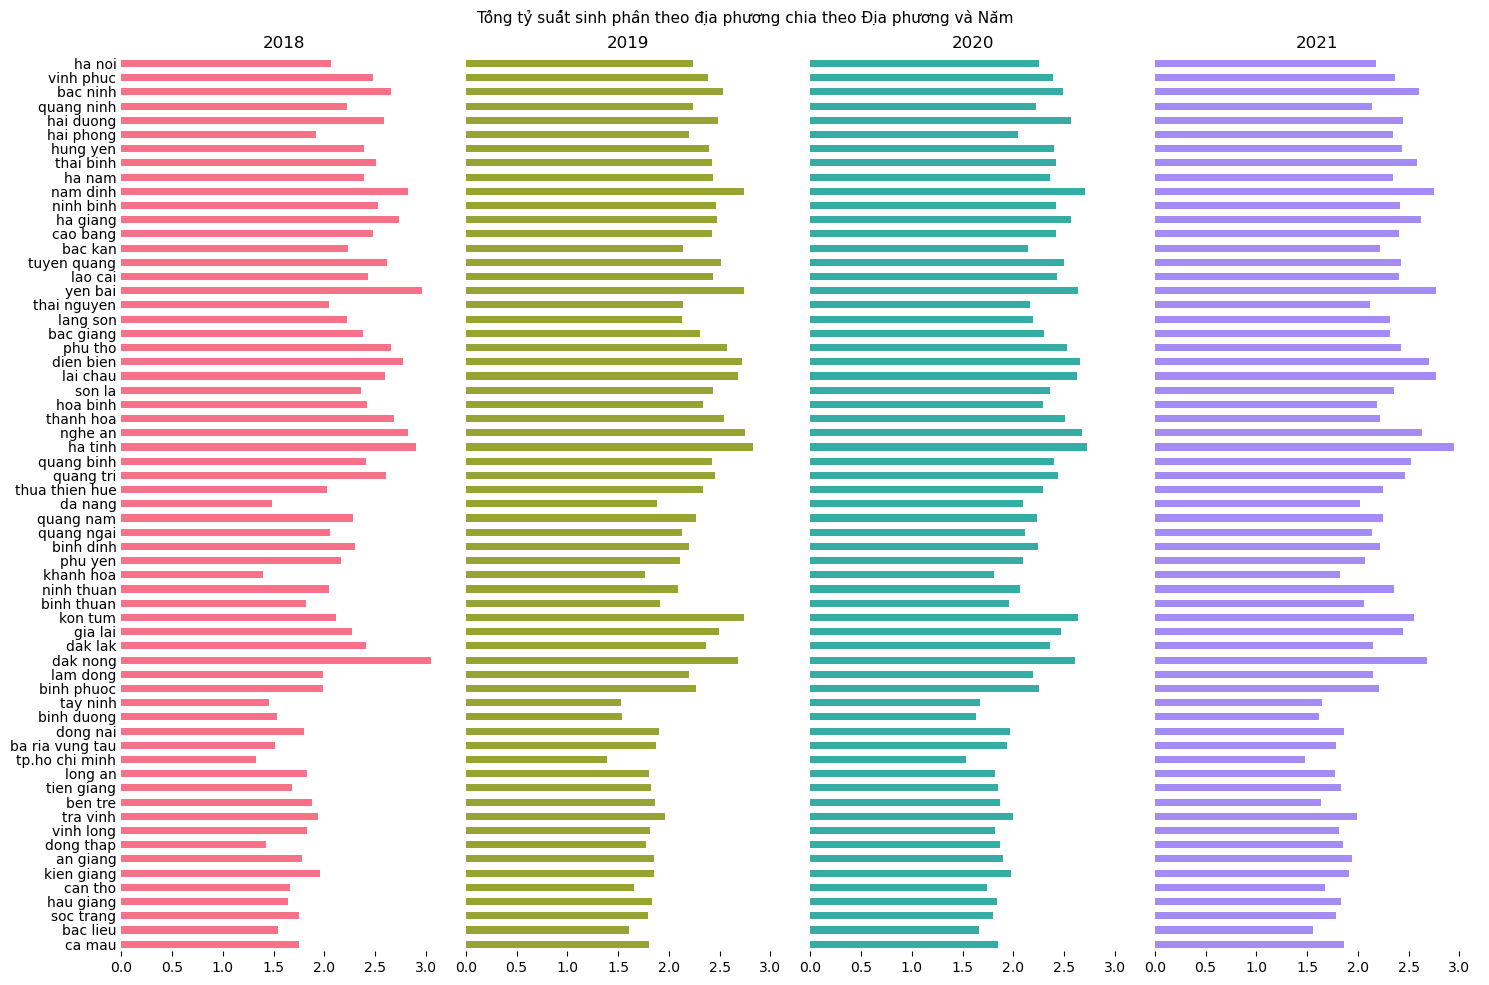

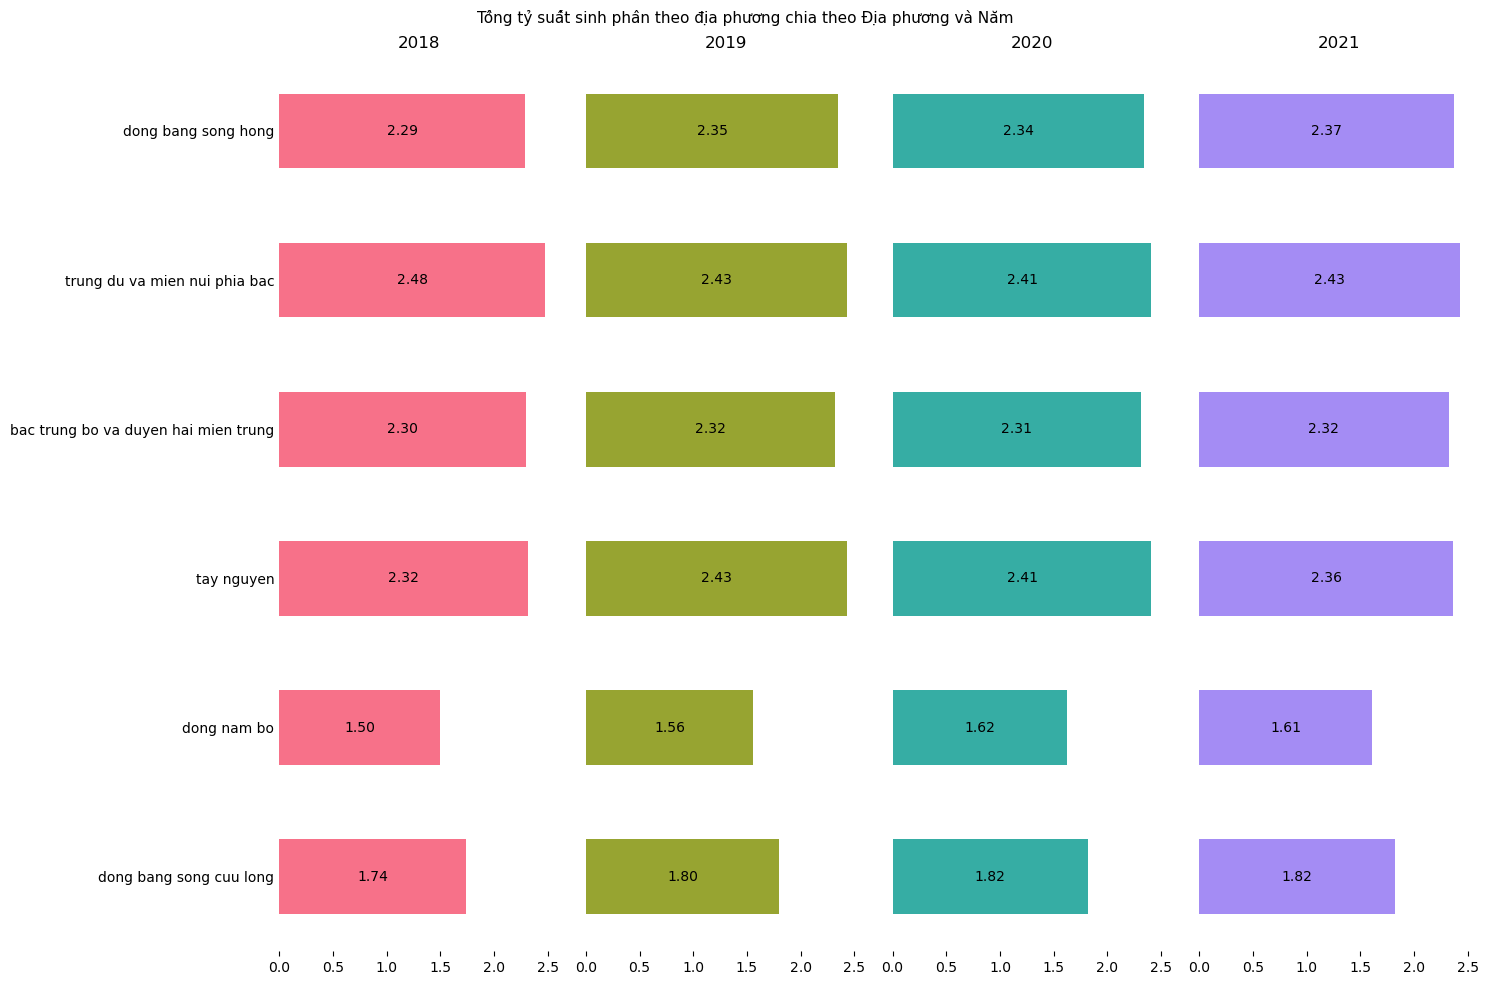

            2018       2019       2020       2021
count  63.000000  63.000000  63.000000  63.000000
mean    2.169206   2.201746   2.206508   2.200317
std     0.441797   0.357701   0.314023   0.345454
min     1.330000   1.390000   1.530000   1.480000
25%     1.825000   1.865000   1.950000   1.885000
50%     2.220000   2.240000   2.240000   2.220000
75%     2.495000   2.455000   2.435000   2.425000
max     3.050000   2.830000   2.730000   2.950000
           2018      2019      2020      2021
count  6.000000  6.000000  6.000000  6.000000
mean   2.105000  2.148333  2.151667  2.151667
std    0.389448  0.373171  0.342544  0.346492
min    1.500000  1.560000  1.620000  1.610000
25%    1.877500  1.930000  1.942500  1.945000
50%    2.295000  2.335000  2.325000  2.340000
75%    2.315000  2.410000  2.392500  2.367500
max    2.480000  2.430000  2.410000  2.430000
2018:
dak nong, TN: 3.05
yen bai, TDMNPB: 2.96
ha tinh, BTBDHMT: 2.9
nam dinh, DBSH: 2.82
nghe an, BTBDHMT: 2.82
-----------------------

In [18]:
report(tongtssinh, None, ['2018', '2019', '2020', '2021'], features[6])

### Tuổi thọ trung bình tính từ lúc sinh phân theo địa phương chia theo Tỉnh-Thành phố và Năm

In [18]:
tuoitho = init_df(yte.copy(), features[8], vung_mien_name, province_name)

69
[nan]
2018           0
2019           0
2020           0
2021           0
Sơ bộ 2021    69
Sơ bộ 2022     0
dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:39: FutureWarning: The default value of regex will change from True to False in a futu

In [72]:
sc_8 = extract_feature(tuoitho, None, years)
sc_8.shape

(63, 6)

In [142]:
sc_8_model = extract_feature(tuoitho, None, years_model)
sc_8_model.shape

(63, 4)

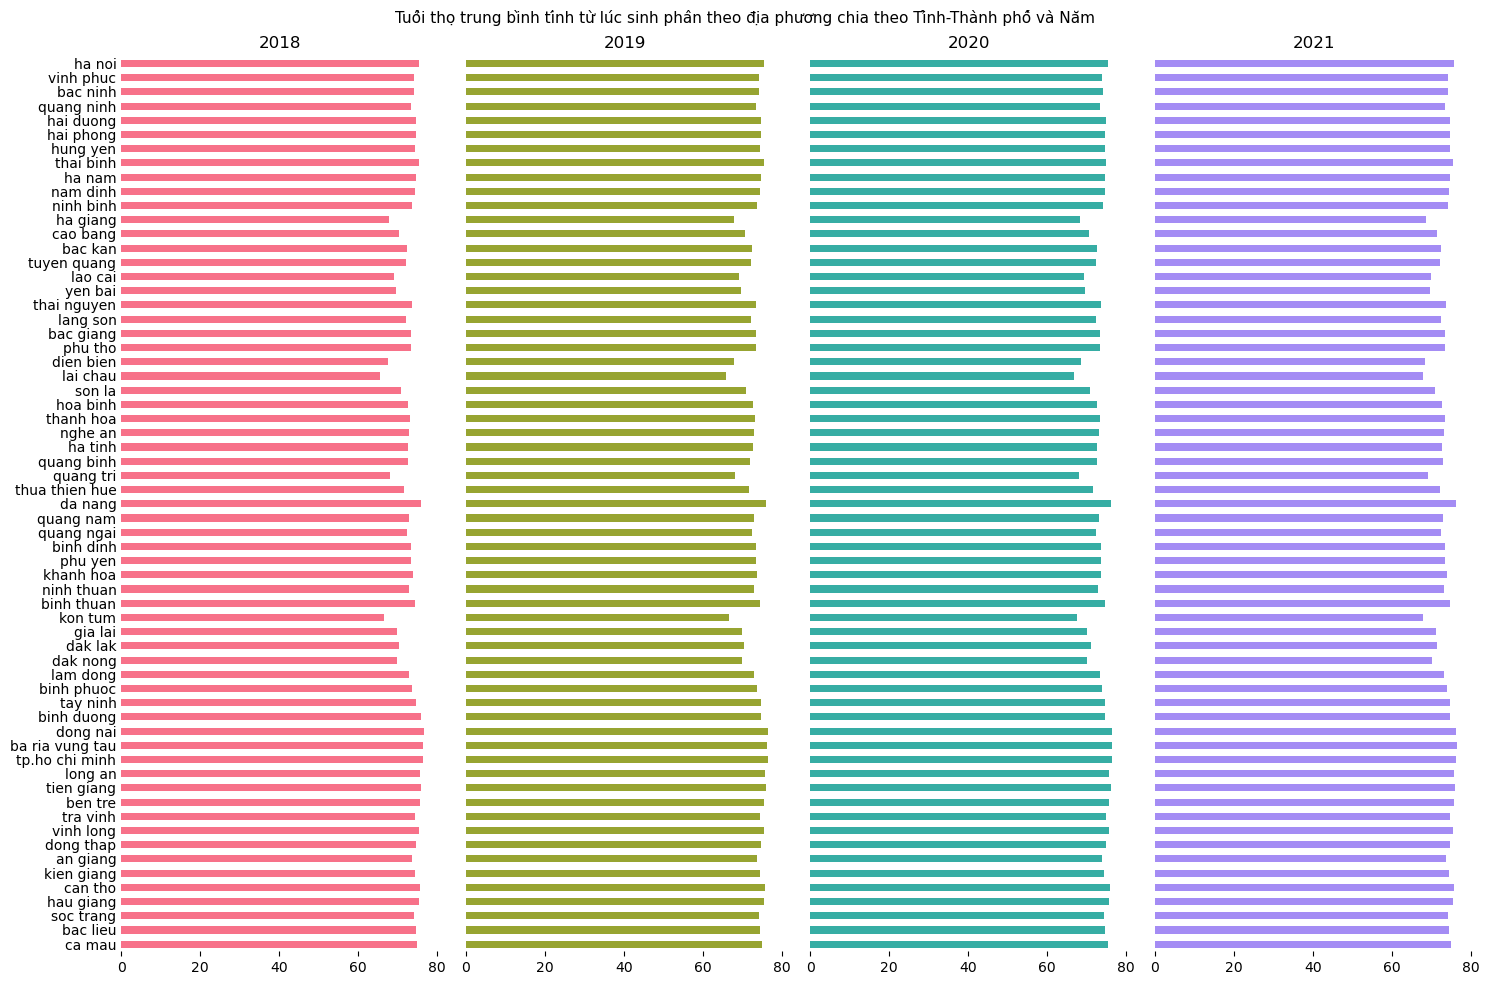

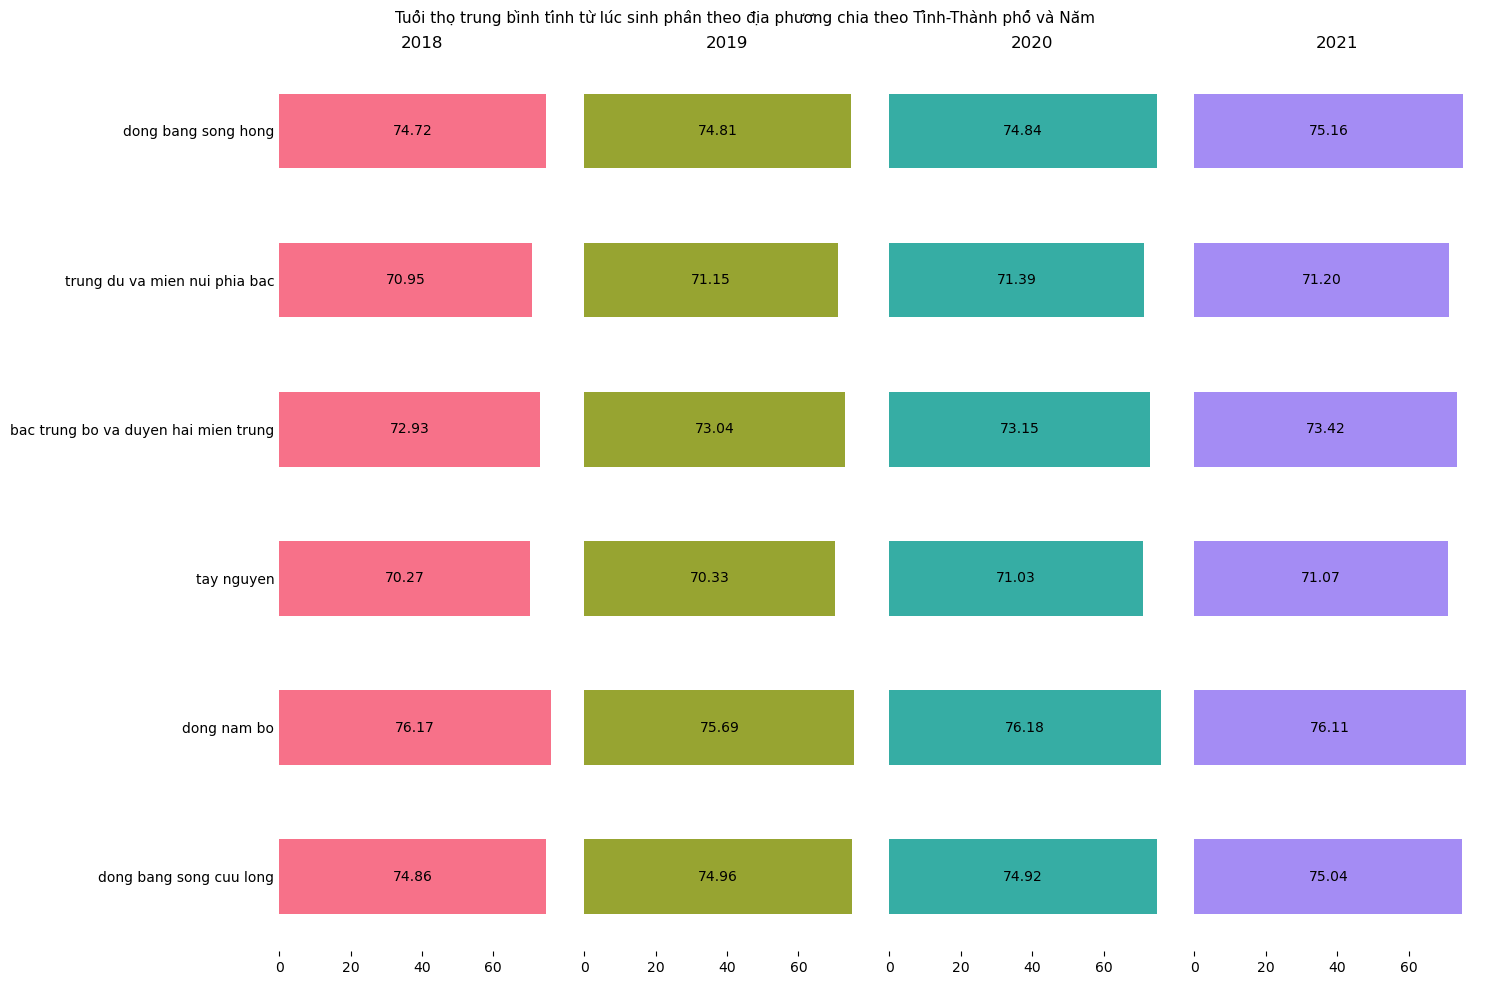

            2018       2019       2020       2021
count  63.000000  63.000000  63.000000  63.000000
mean   73.145873  73.209841  73.277937  73.413016
std     2.501866   2.464085   2.335692   2.136717
min    65.660000  65.830000  66.690000  67.900000
25%    72.445000  72.430000  72.500000  72.560000
50%    73.650000  73.740000  73.680000  73.710000
75%    74.670000  74.735000  74.760000  74.730000
max    76.600000  76.670000  76.470000  76.410000
            2018       2019       2020       2021
count   6.000000   6.000000   6.000000   6.000000
mean   73.316667  73.330000  73.585000  73.666667
std     2.346296   2.202426   2.079738   2.143545
min    70.270000  70.330000  71.030000  71.070000
25%    71.445000  71.622500  71.830000  71.755000
50%    73.825000  73.925000  73.995000  74.230000
75%    74.825000  74.922500  74.900000  75.130000
max    76.170000  75.690000  76.180000  76.110000
2018:
dong nai, DNB: 76.6
tp.ho chi minh, DNB: 76.56
ba ria vung tau, DNB: 76.35
da nang, BTBDHMT: 7

In [20]:
report(tuoitho, None, ['2018', '2019', '2020', '2021'], features[8])

### Tỷ suất chết của trẻ em dưới 5 tuổi phân theo địa phương chia theo Tỉnh-Thành phố và Năm

In [19]:
tschet_duoi5 = init_df(yte.copy(), features[10], vung_mien_name, province_name)

69
[nan]
2018           0
2019           0
2020           0
2021           0
Sơ bộ 2021    69
Sơ bộ 2022     0
dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:39: FutureWarning: The default value of regex will change from True to False in a futu

In [74]:
sc_10 = extract_feature(tschet_duoi5, None, years)
sc_10.shape

(63, 6)

In [144]:
sc_10_model = extract_feature(tschet_duoi5, None, years_model)
sc_10_model.shape

(63, 4)

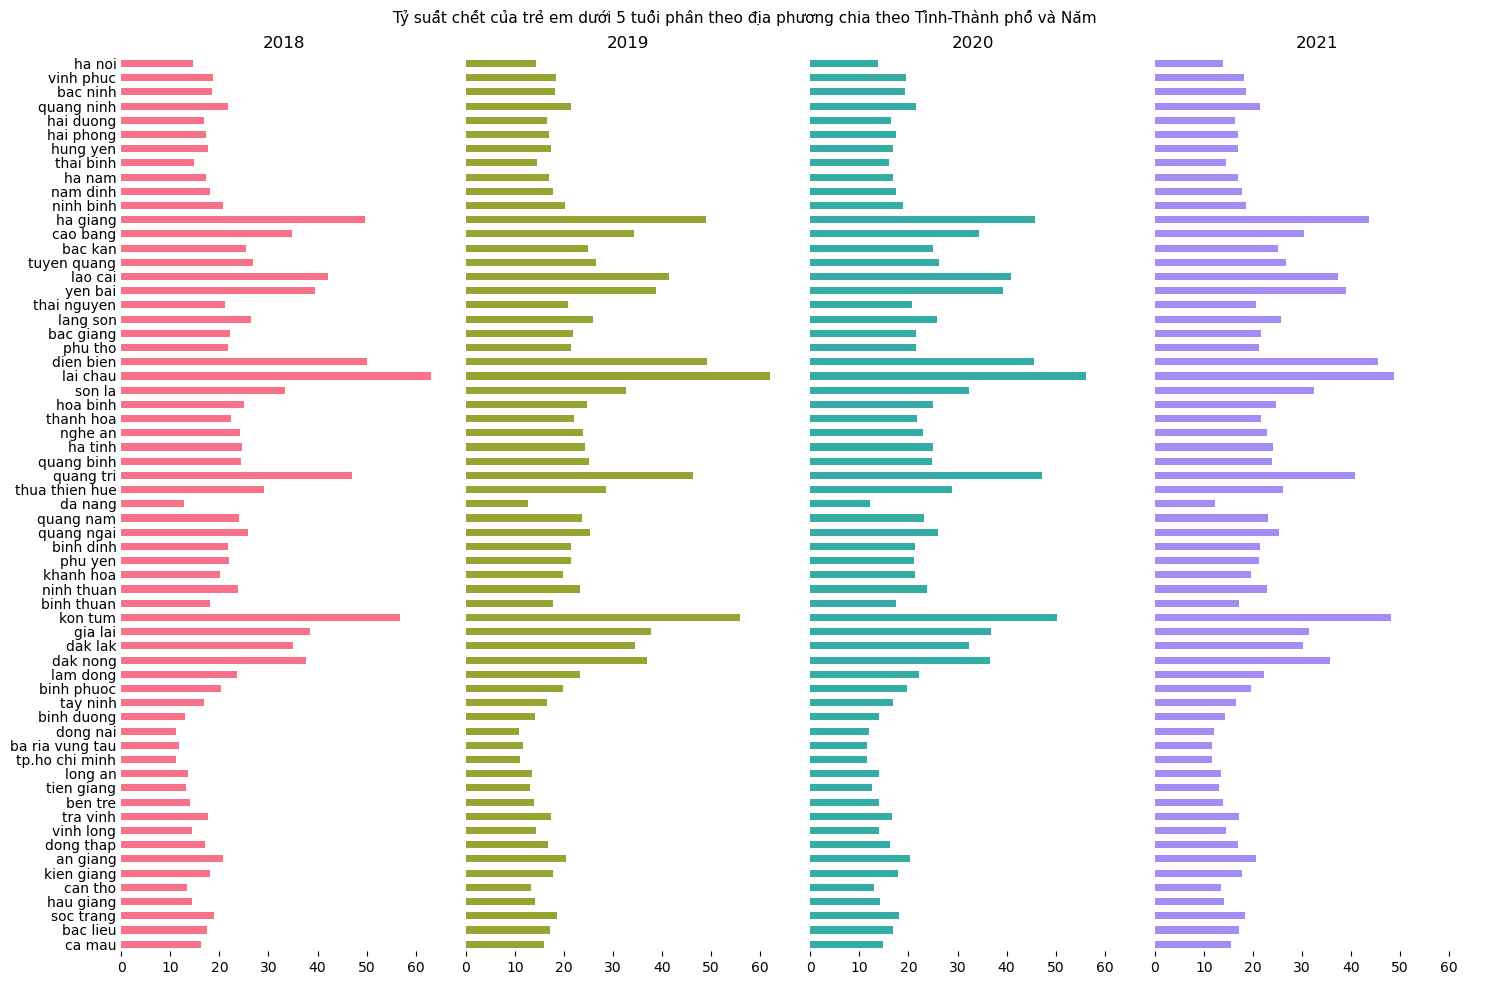

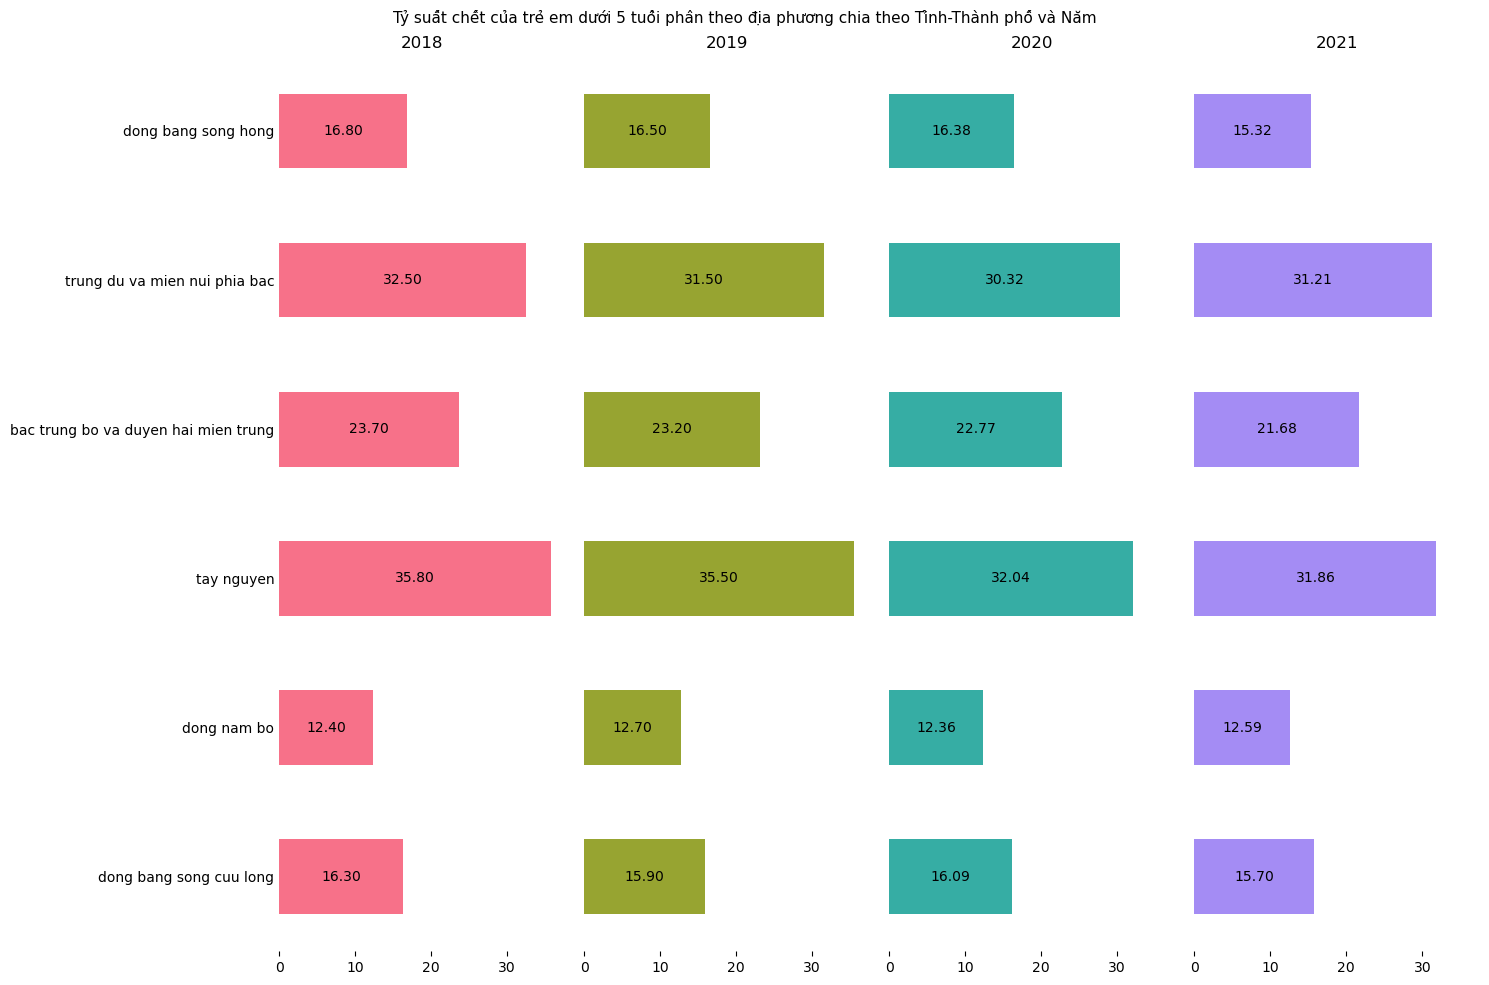

            2018       2019       2020       2021
count  63.000000  63.000000  63.000000  63.000000
mean   23.858730  23.488889  23.123175  22.444286
std    11.372713  11.151741  10.328294   9.216556
min    11.100000  10.900000  11.460000  11.640000
25%    17.000000  16.700000  16.535000  16.680000
50%    20.700000  20.400000  20.630000  20.510000
75%    25.650000  25.250000  25.410000  25.175000
max    63.100000  61.900000  56.080000  48.760000
            2018       2019       2020       2021
count   6.000000   6.000000   6.000000   6.000000
mean   22.916667  22.550000  21.660000  21.393333
std     9.489240   9.231197   8.116223   8.399980
min    12.400000  12.700000  12.360000  12.590000
25%    16.425000  16.050000  16.162500  15.415000
50%    20.250000  19.850000  19.575000  18.690000
75%    30.300000  29.425000  28.432500  28.827500
max    35.800000  35.500000  32.040000  31.860000
2018:
lai chau, TDMNPB: 63.1
kon tum, TN: 56.8
dien bien, TDMNPB: 50.0
ha giang, TDMNPB: 49.7
quang 

In [23]:
report(tschet_duoi5, None, ['2018', '2019', '2020', '2021'], features[10])

### Tỷ lệ trẻ em dưới một tuổi được tiêm chủng đầy đủ các loại vắc xin phân theo địa phương chia theo Địa phương và Năm

In [20]:
tlkid_duoi1_tiemchung = init_df(yte.copy(), features[11], vung_mien_name, province_name)

69
[nan]
2018           0
2019           0
2020           0
2021           0
Sơ bộ 2021     0
Sơ bộ 2022    69
dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:39: FutureWarning: The default value of regex will change from True to False in a futu

In [76]:
sc_11 = extract_feature(tlkid_duoi1_tiemchung, None, years)
sc_11.shape

(63, 6)

In [146]:
sc_11_model = extract_feature(tlkid_duoi1_tiemchung, None, years_model)
sc_11_model.shape

(63, 4)

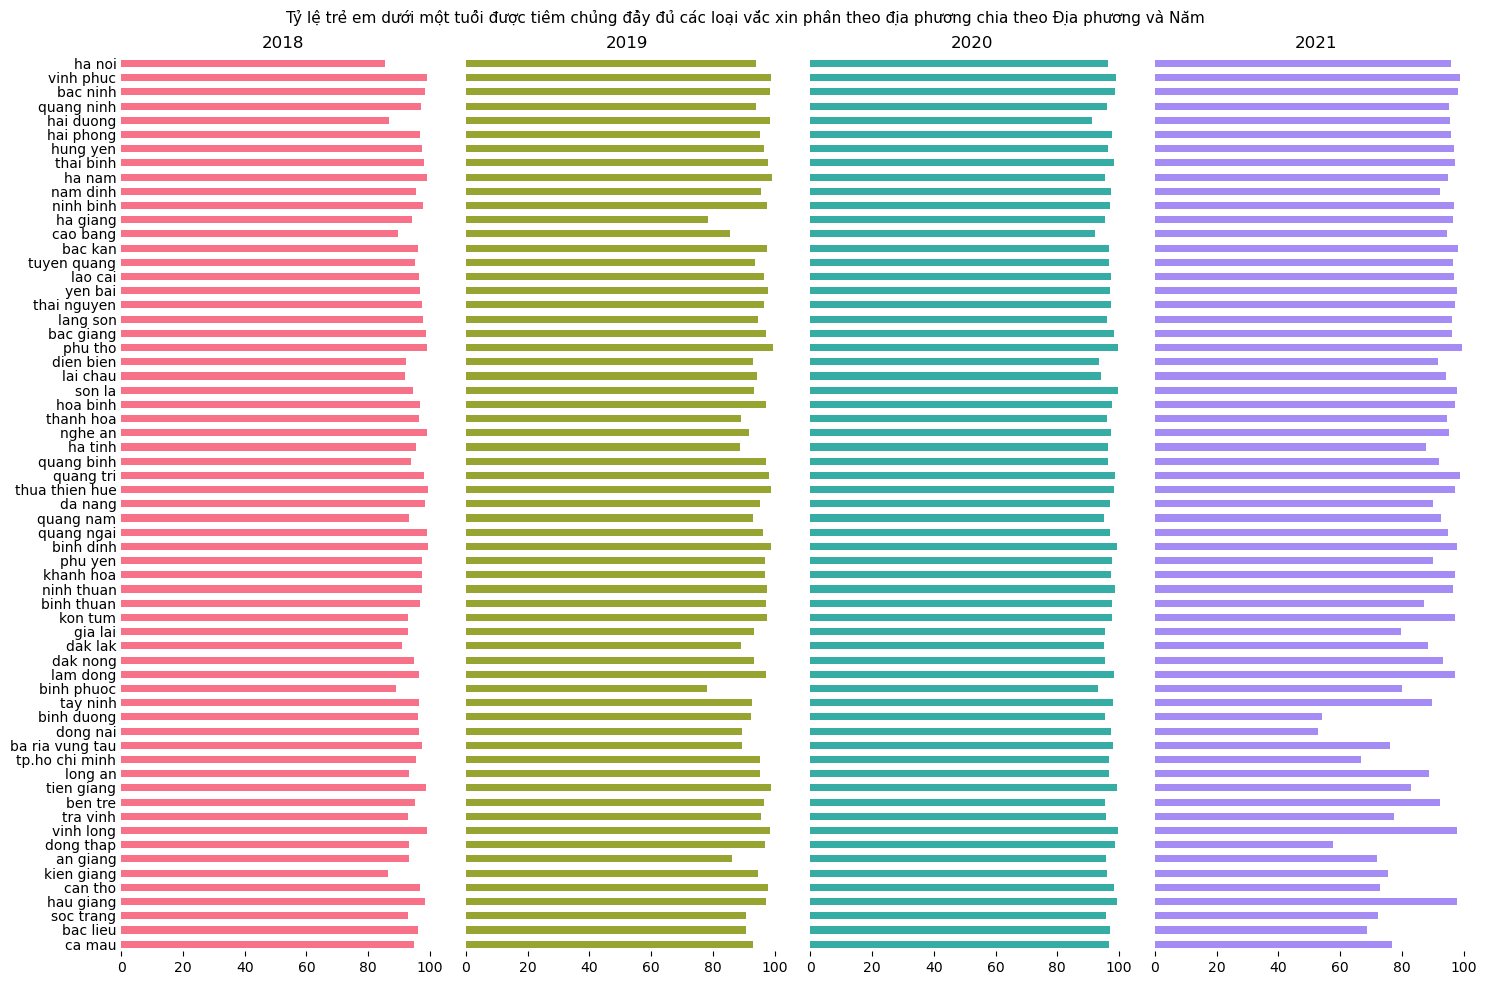

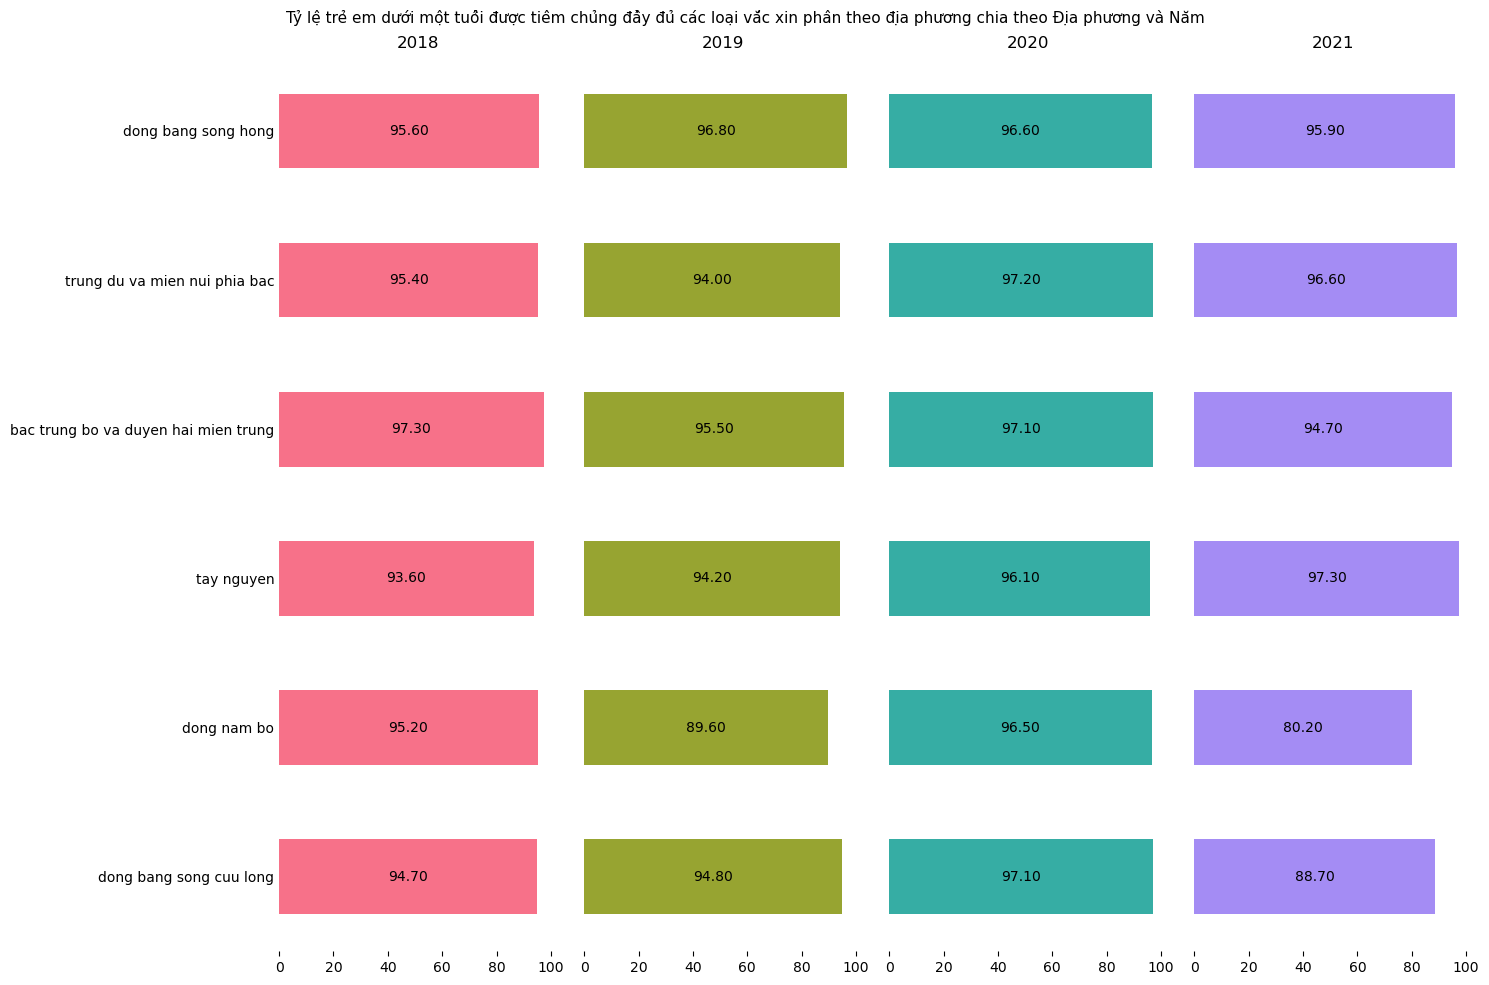

            2018       2019       2020       2021
count  63.000000  63.000000  63.000000  63.000000
mean   95.530159  94.585714  96.888889  89.357143
std     3.235271   4.414597   1.736804  11.599273
min    85.500000  78.000000  91.100000  52.800000
25%    93.650000  93.100000  95.900000  87.600000
50%    96.500000  95.600000  97.100000  95.000000
75%    97.700000  97.500000  98.150000  97.150000
max    99.500000  99.600000  99.600000  99.500000
           2018       2019       2020       2021
count   6.00000   6.000000   6.000000   6.000000
mean   95.30000  94.150000  96.766667  92.233333
std     1.21326   2.449286   0.436654   6.656626
min    93.60000  89.600000  96.100000  80.200000
25%    94.82500  94.050000  96.525000  90.200000
50%    95.30000  94.500000  96.850000  95.300000
75%    95.55000  95.325000  97.100000  96.425000
max    97.30000  96.800000  97.200000  97.300000
2018:
binh dinh, BTBDHMT: 99.5
thua thien hue, BTBDHMT: 99.5
vinh long, DBSCL: 99.1
quang ngai, BTBDHMT: 99.1

In [27]:
report(tlkid_duoi1_tiemchung, None, ['2018', '2019', '2020', '2021'], features[11])

### Tỷ lệ trẻ em dưới 5 tuổi bị suy dinh dưỡng phân theo địa phương chia theo Địa phương, Năm và Phân tổ

In [21]:
tlkid_duoi5_suydinhduong = init_df(yte.copy(), features[13], vung_mien_name, province_name)

69
['Cân nặng theo tuổi' 'Chiều cao theo tuổi' 'Cân nặng theo chiều cao']
2018          207
2019          207
2020          207
2021            0
Sơ bộ 2021    207
Sơ bộ 2022    207
dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:39: FutureWarning: The default value of regex will change from True to False in a futu

In [23]:
# for sub in tlkid_duoi5_suydinhduong.Sub_Feature.unique():
#     report(tlkid_duoi5_suydinhduong, sub, ['2021', '2022'], str(features[13]) + " | " + str(sub))

In [81]:
mean_suydinhduong = tmp.groupby('Province', sort=False)[years].mean().reset_index()
sc_13 = extract_feature(mean_suydinhduong, None, years)
sc_13.shape

(63, 6)

In [82]:
sc_13

array([[        nan,         nan,         nan,  6.66666667,         nan,
                nan],
       [        nan,         nan,         nan, 12.06666667,         nan,
                nan],
       [        nan,         nan,         nan, 11.7       ,         nan,
                nan],
       [        nan,         nan,         nan, 12.        ,         nan,
                nan],
       [        nan,         nan,         nan, 11.2       ,         nan,
                nan],
       [        nan,         nan,         nan,  9.06666667,         nan,
                nan],
       [        nan,         nan,         nan, 12.        ,         nan,
                nan],
       [        nan,         nan,         nan, 12.73333333,         nan,
                nan],
       [        nan,         nan,         nan, 12.1       ,         nan,
                nan],
       [        nan,         nan,         nan, 11.26666667,         nan,
                nan],
       [        nan,         nan,         nan, 11.

In [150]:
mean_suydinhduong = tmp.groupby('Province', sort=False)[years].mean().reset_index()
sc_13_model = extract_feature(mean_suydinhduong, None, years_model)
sc_13_model.shape

(63, 4)

In [79]:
tmp = tlkid_duoi5_suydinhduong.copy()
tmp['Province'] = pd.Categorical(tmp['Province'], categories=tmp['Province'].unique(), ordered=True)
mean_suydinhduong = tmp.groupby('Province', sort=False)[['2021','2022']].mean().reset_index()
# report(mean_suydinhduong, None, ['2021', '2022'], str(features[13]))

### Số bác sĩ phân theo địa phương

In [22]:
sobacsi = init_df(yte.copy(), features[14], vung_mien_name, province_name)

69
[nan]
2018           0
2019           0
2020           0
2021           0
Sơ bộ 2021    69
Sơ bộ 2022     0
dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:39: FutureWarning: The default value of regex will change from True to False in a futu

In [84]:
sc_14 = extract_feature(sobacsi, None, years)
sc_14.shape

(63, 6)

In [153]:
sc_14_model = extract_feature(sobacsi, None, years_model)
sc_14_model.shape

(63, 4)

In [326]:
average_describe(sobacsi, None, ['2018','2019','2020','2021'])

count       63.000000
mean      1486.301587
std       1840.274049
min        446.250000
25%        783.750000
50%       1079.000000
75%       1528.250000
max      13044.750000
dtype: float64
dak nong  |  tp.ho chi minh


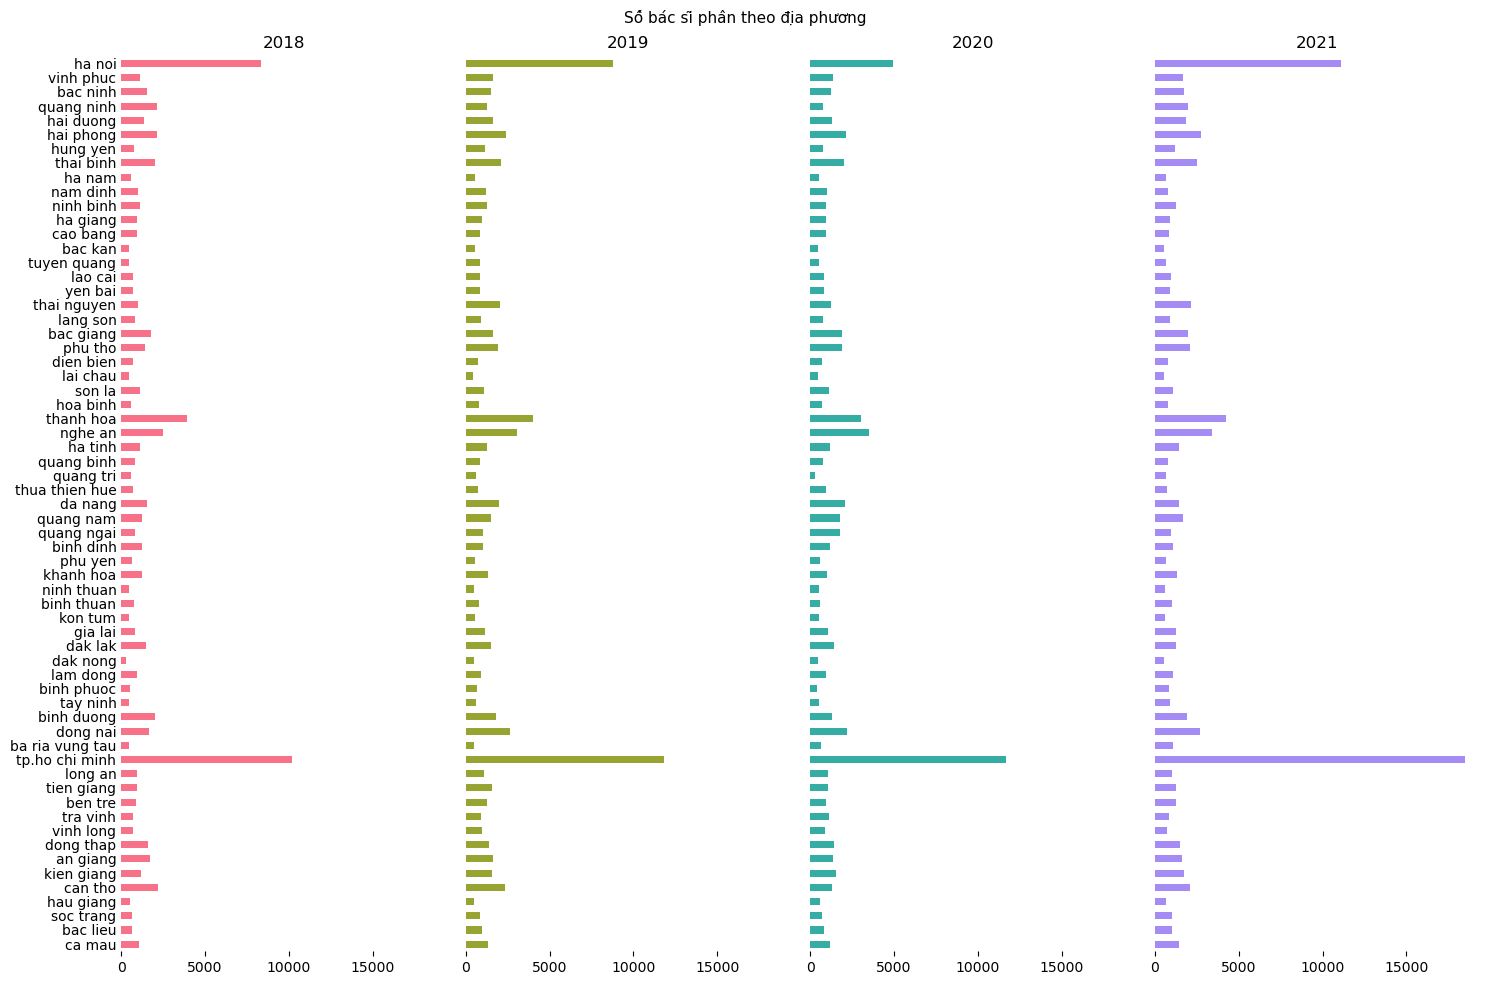

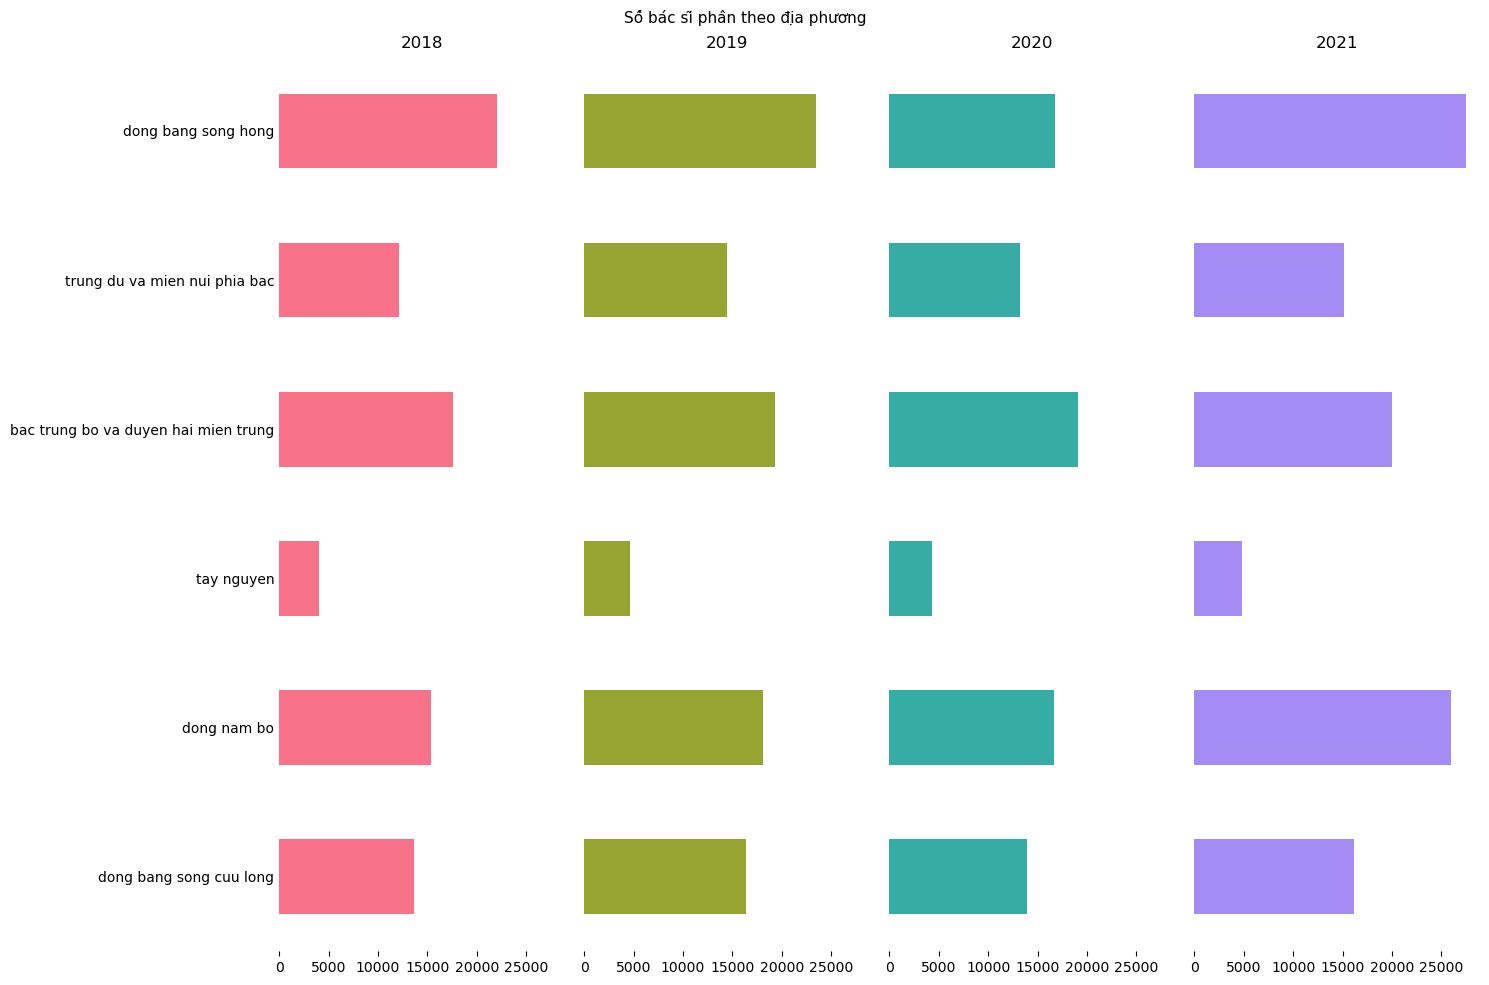

               2018          2019          2020          2021
count     63.000000     63.000000     63.000000     63.000000
mean    1345.841270   1527.444444   1333.269841   1738.650794
std     1583.743006   1756.799562   1534.778982   2574.921096
min      272.000000    442.000000    282.000000    519.000000
25%      674.000000    825.500000    713.500000    808.500000
50%      925.000000   1101.000000    975.000000   1072.000000
75%     1449.500000   1588.000000   1346.500000   1694.500000
max    10193.000000  11824.000000  11689.000000  18473.000000
               2018          2019          2020          2021
count      6.000000      6.000000      6.000000      6.000000
mean   14131.333333  16038.166667  13999.333333  18255.833333
std     6061.681406   6347.131680   5184.206002   8287.918277
min     3990.000000   4671.000000   4342.000000   4786.000000
25%    12476.250000  14912.000000  13395.250000  15397.500000
50%    14529.500000  17204.500000  15299.000000  18069.500000
75%    1

In [39]:
report(sobacsi, None, ['2018', '2019', '2020', '2021'], features[14])

### Số người nhiễm HIVAIDS phân theo địa phương chia theo Địa phương, Năm và Phân tổ

In [23]:
hivaids = init_df(yte.copy(), features[3], vung_mien_name, province_name)

69
['Số người nhiễm HIV/AIDS - Phát hiện mới năm 2021'
 'Số người nhiễm HIV/AIDS còn sống - Lũy kế đến 31/12'
 'Số người hiện nhiễm HIV/AIDS được phát hiện trên 100.000 dân - Lũy kế đến 31/12']
2018          207
2019          207
2020          207
2021            0
Sơ bộ 2021    207
Sơ bộ 2022    207
dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:39: FutureWarning: The default value of regex will change from True to False in a futu

In [87]:
sc_3 = extract_feature(sum_hivaids, None, ['2021','2022'])
sc_3.shape

(63, 2)

In [34]:
sum_hivaids = tmp.groupby('Province', sort=False)[years_model].sum().reset_index()
sc_3_model = extract_feature(sum_hivaids, None, years_model)
sc_3_model.shape

NameError: name 'years_model' is not defined

In [330]:
average_describe(sum_hivaids, None, ['2021', '2022'])

count       63.000000
mean      3652.452381
std       5972.054305
min        277.500000
25%       1098.500000
50%       2090.000000
75%       4336.000000
max      45039.500000
dtype: float64
quang tri  |  tp.ho chi minh


In [86]:
tmp = hivaids[hivaids.Sub_Feature.isin(hivaids.Sub_Feature.unique()[:-1])].copy()
tmp['Province'] = pd.Categorical(tmp['Province'], categories=tmp['Province'].unique(), ordered=True)
sum_hivaids = tmp.groupby('Province', sort=False)[['2021','2022']].sum().reset_index()
# report(sum_hivaids, None, ['2021', '2022'], str(features[3]))

In [43]:
# for sub in hivaids.Sub_Feature.unique()[:-1]:
#     report(hivaids, sub, ['2021', '2022'], str(features[3]) + " | " + str(sub))

### Số giường bệnh phân theo địa phương

In [24]:
giuongbenh = init_df(yte.copy(), features[12], vung_mien_name, province_name)

69
['Tổng số' 'Công lập' 'Ngoài công lập' nan]
2018          276
2019          276
2020          276
2021           81
Sơ bộ 2021    276
Sơ bộ 2022    276
dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_13188\3986356057.py:39: FutureWarning: The default value of regex will change from True to False in a futu

In [90]:
sc_12 = extract_feature(giuongbenh, giuongbenh.Sub_Feature.unique()[0], ['2021','2022'])
sc_12.shape

(63, 2)

In [159]:
sc_12_model = extract_feature(giuongbenh, giuongbenh.Sub_Feature.unique()[0], years_model)
sc_12_model.shape

(63, 4)

In [334]:
average_describe(giuongbenh, giuongbenh.Sub_Feature.unique()[0], ['2021', '2022'])

count       63.000000
mean      4915.214286
std       4699.038114
min       1030.000000
25%       2420.500000
50%       3860.000000
75%       5941.000000
max      33373.000000
dtype: float64
bac kan tp.ho chi minh


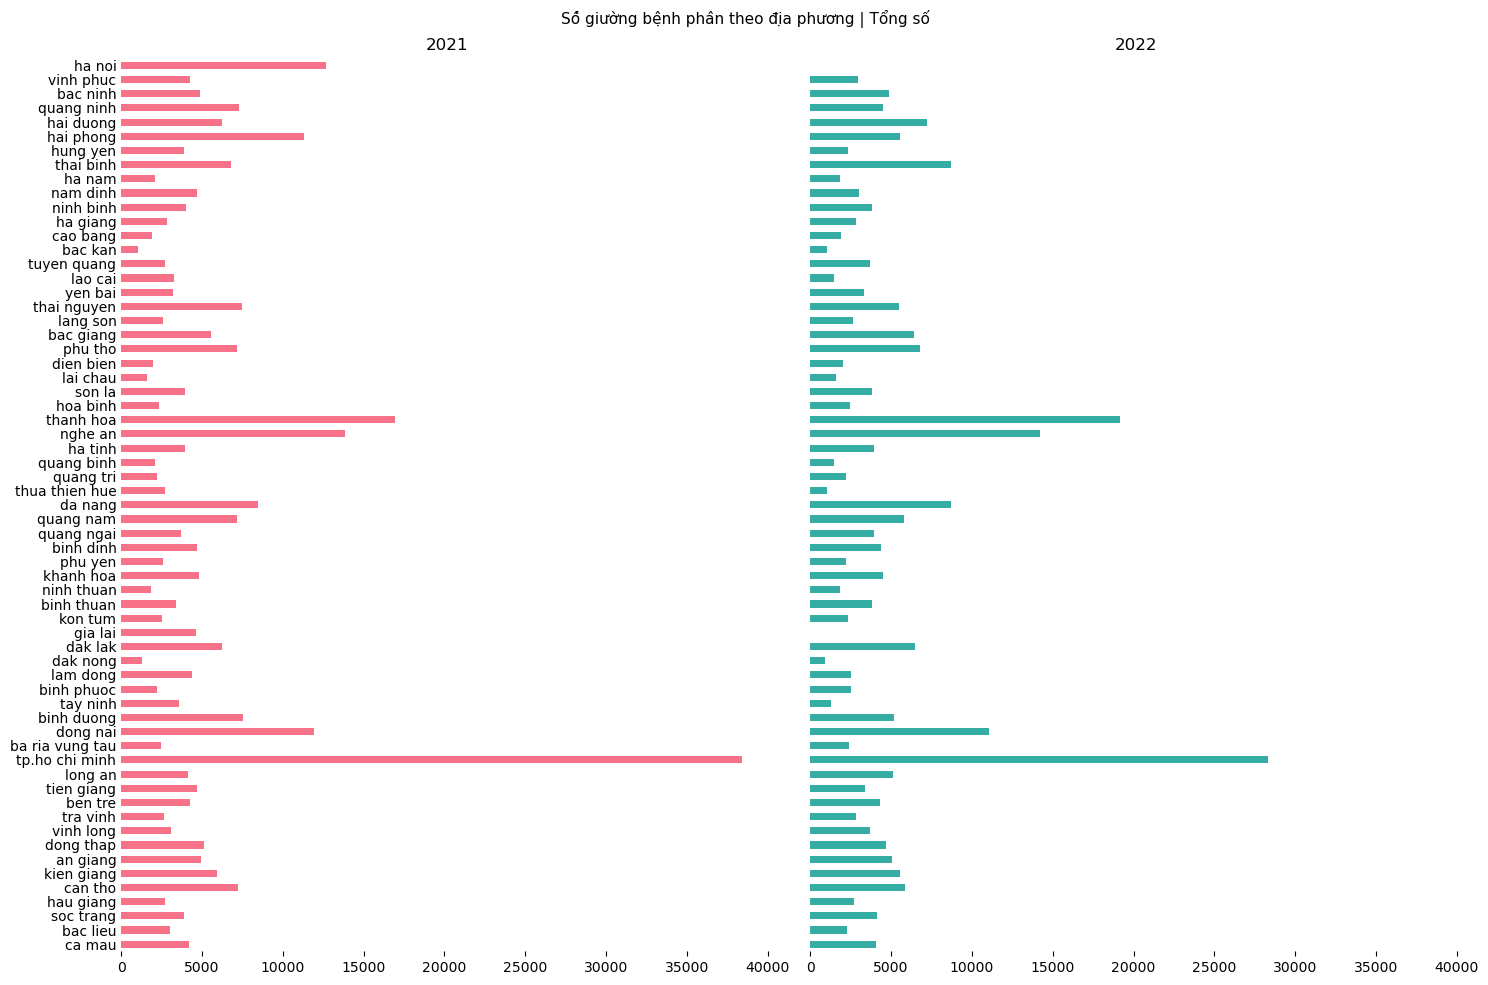

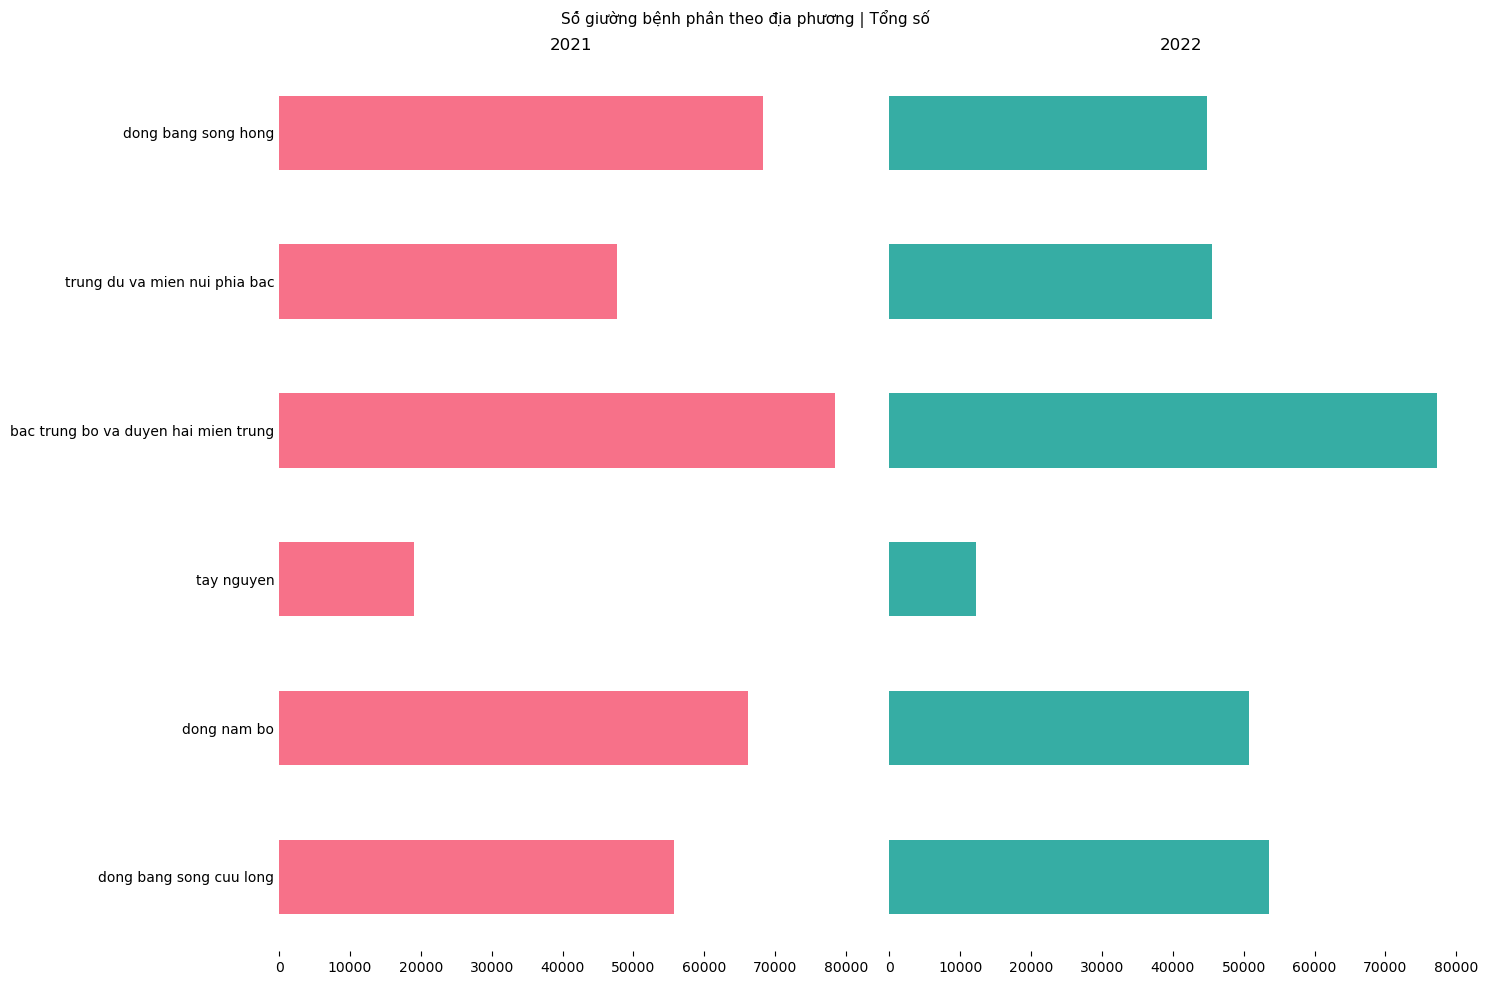

               2021          2022
count     63.000000     63.000000
mean    5320.349206   4510.079365
std     5262.947583   4379.496665
min     1030.000000      0.000000
25%     2667.000000   2293.500000
50%     4022.000000   3715.000000
75%     6058.000000   5156.000000
max    38409.000000  28337.000000
               2021          2022
count      6.000000      6.000000
mean   55863.666667  47355.833333
std    20936.390784  20924.186707
min    19028.000000  12233.000000
25%    49650.000000  44980.750000
50%    60955.000000  48115.000000
75%    67712.000000  52870.750000
max    78398.000000  77280.000000
2021:
tp.ho chi minh, DNB: 38409.0
thanh hoa, BTBDHMT: 16923.0
nghe an, BTBDHMT: 13860.0
ha noi, DBSH: 12695.0
dong nai, DNB: 11920.0
------------------------------
2022:
tp.ho chi minh, DNB: 28337.0
thanh hoa, BTBDHMT: 19142.0
nghe an, BTBDHMT: 14241.0
dong nai, DNB: 11030.0
thai binh, DBSH: 8711.0
------------------------------


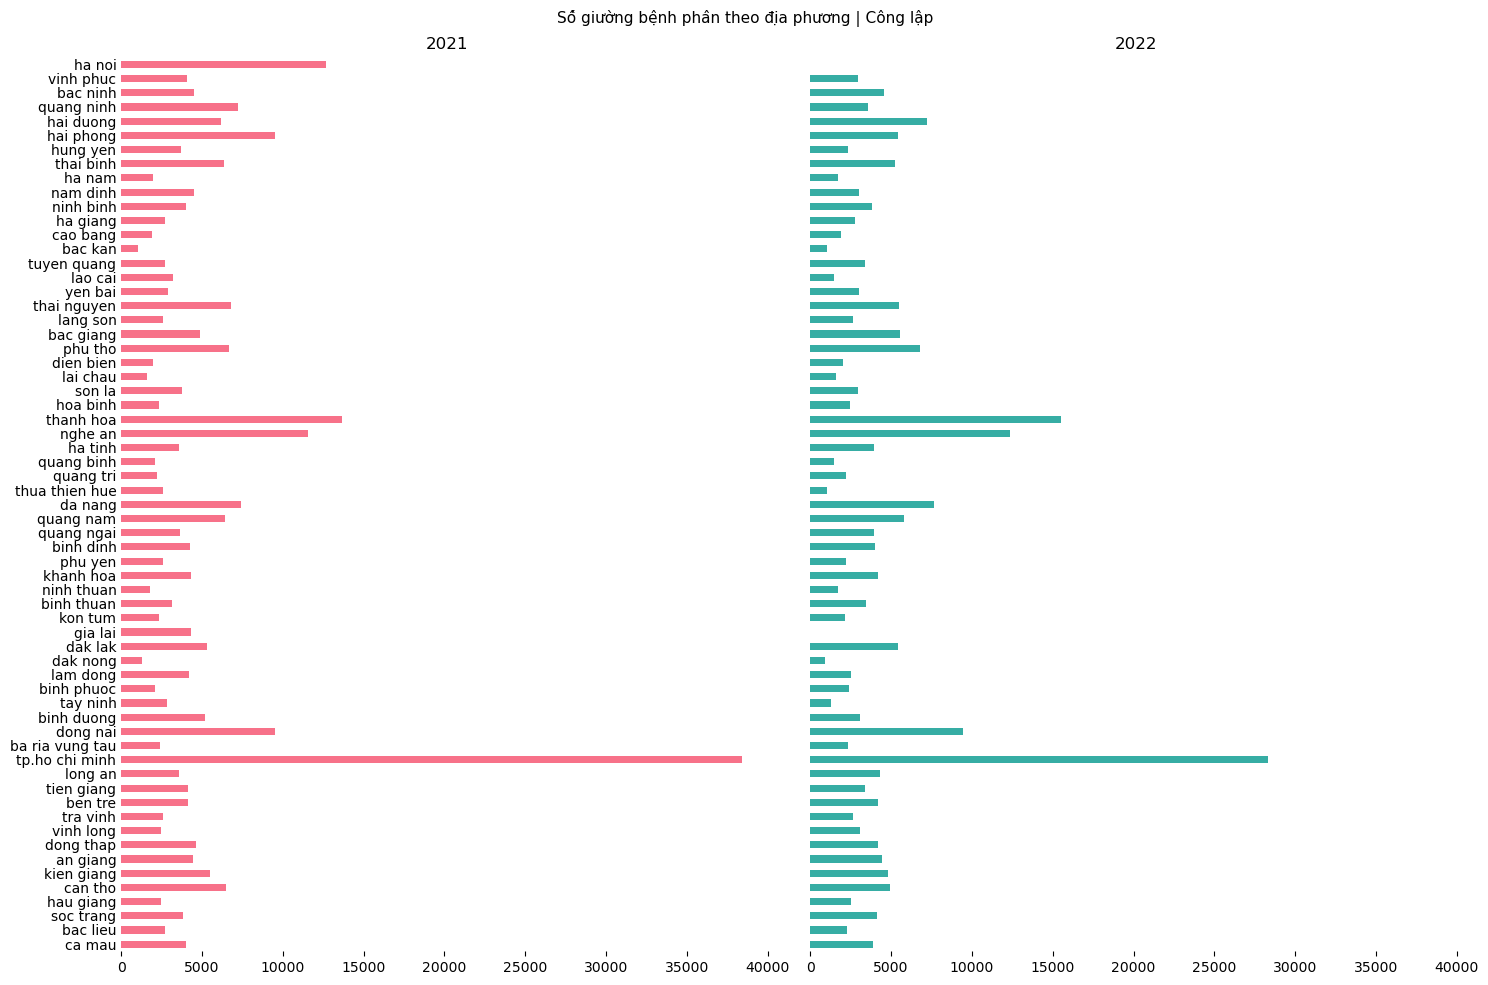

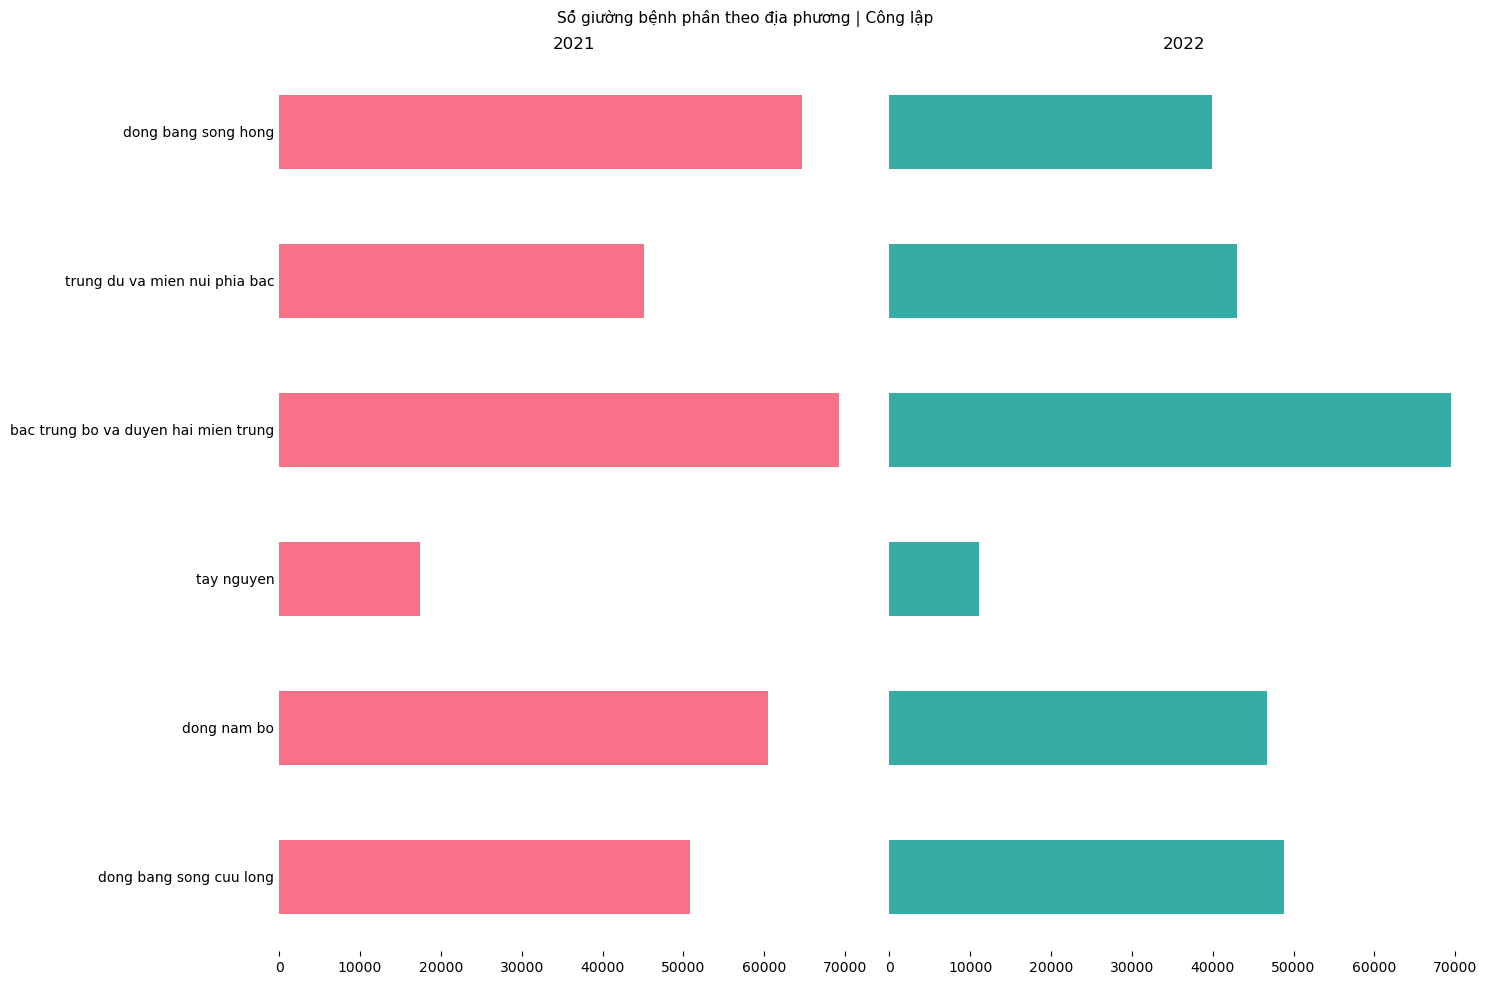

               2021          2022
count     63.000000     61.000000
mean    4884.761905   4242.803279
std     5029.549597   4041.733650
min     1030.000000    905.000000
25%     2563.500000   2300.000000
50%     3800.000000   3365.000000
75%     5269.000000   4559.000000
max    38409.000000  28337.000000
               2021          2022
count      6.000000      6.000000
mean   51290.000000  43135.166667
std    18830.430988  18855.516163
min    17407.000000  11047.000000
25%    46527.250000  40636.500000
50%    55655.500000  44839.500000
75%    63613.750000  48257.250000
max    69271.000000  69453.000000
2021:
tp.ho chi minh, DNB: 38409.0
thanh hoa, BTBDHMT: 13650.0
ha noi, DBSH: 12695.0
nghe an, BTBDHMT: 11529.0
dong nai, DNB: 9535.0
------------------------------
2022:
tp.ho chi minh, DNB: 28337.0
thanh hoa, BTBDHMT: 15486.0
nghe an, BTBDHMT: 12380.0
dong nai, DNB: 9430.0
da nang, BTBDHMT: 7647.0
------------------------------


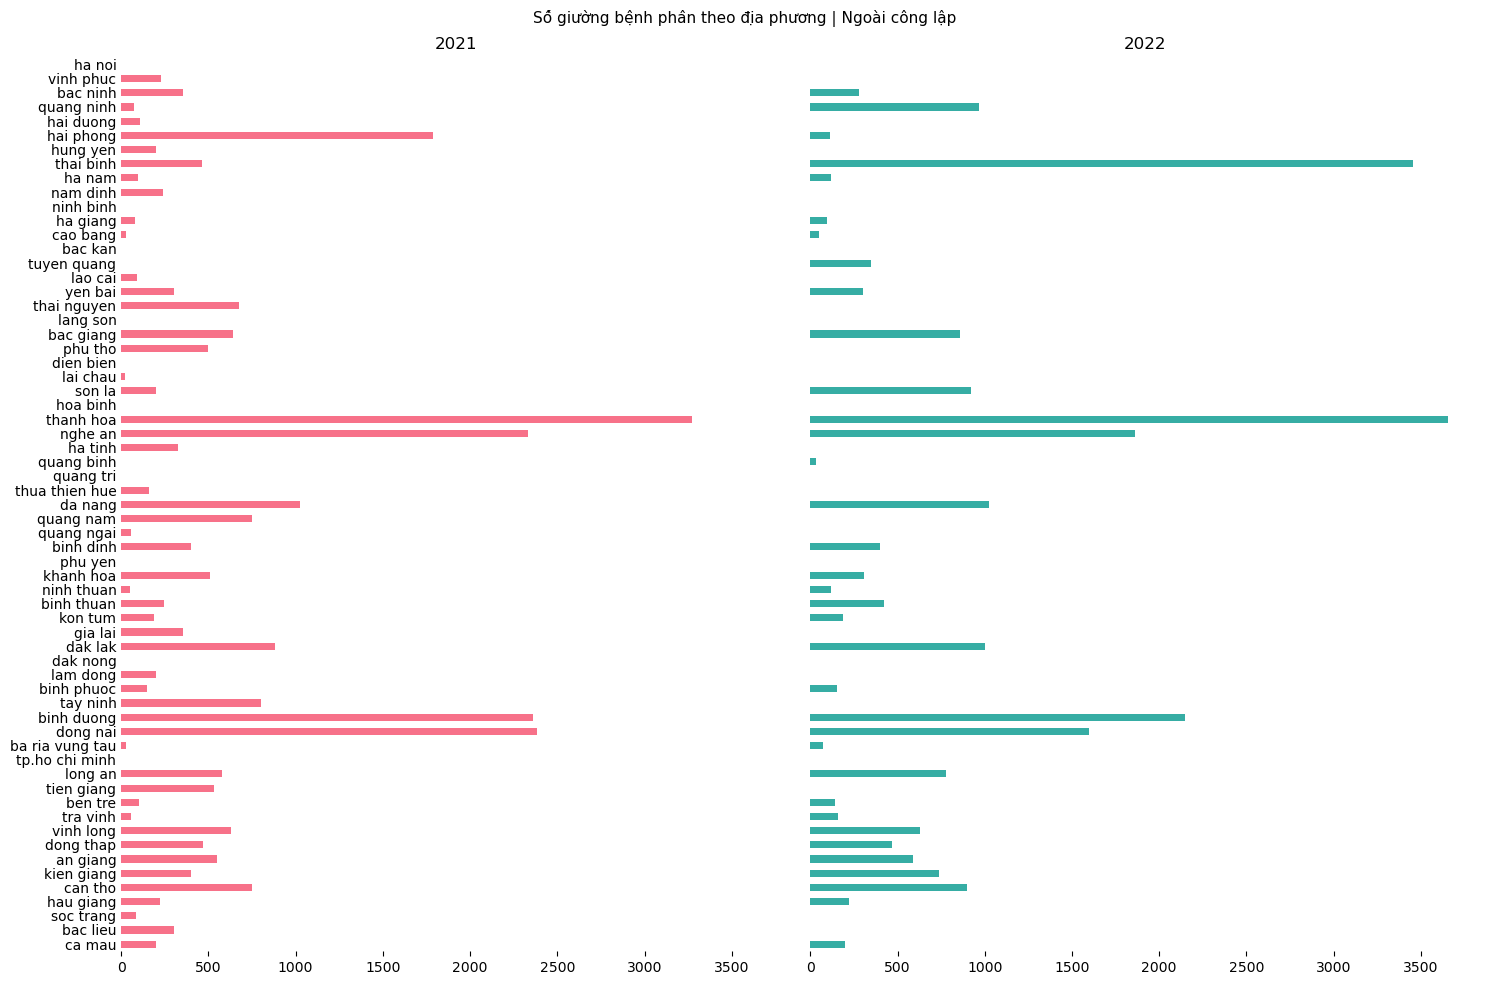

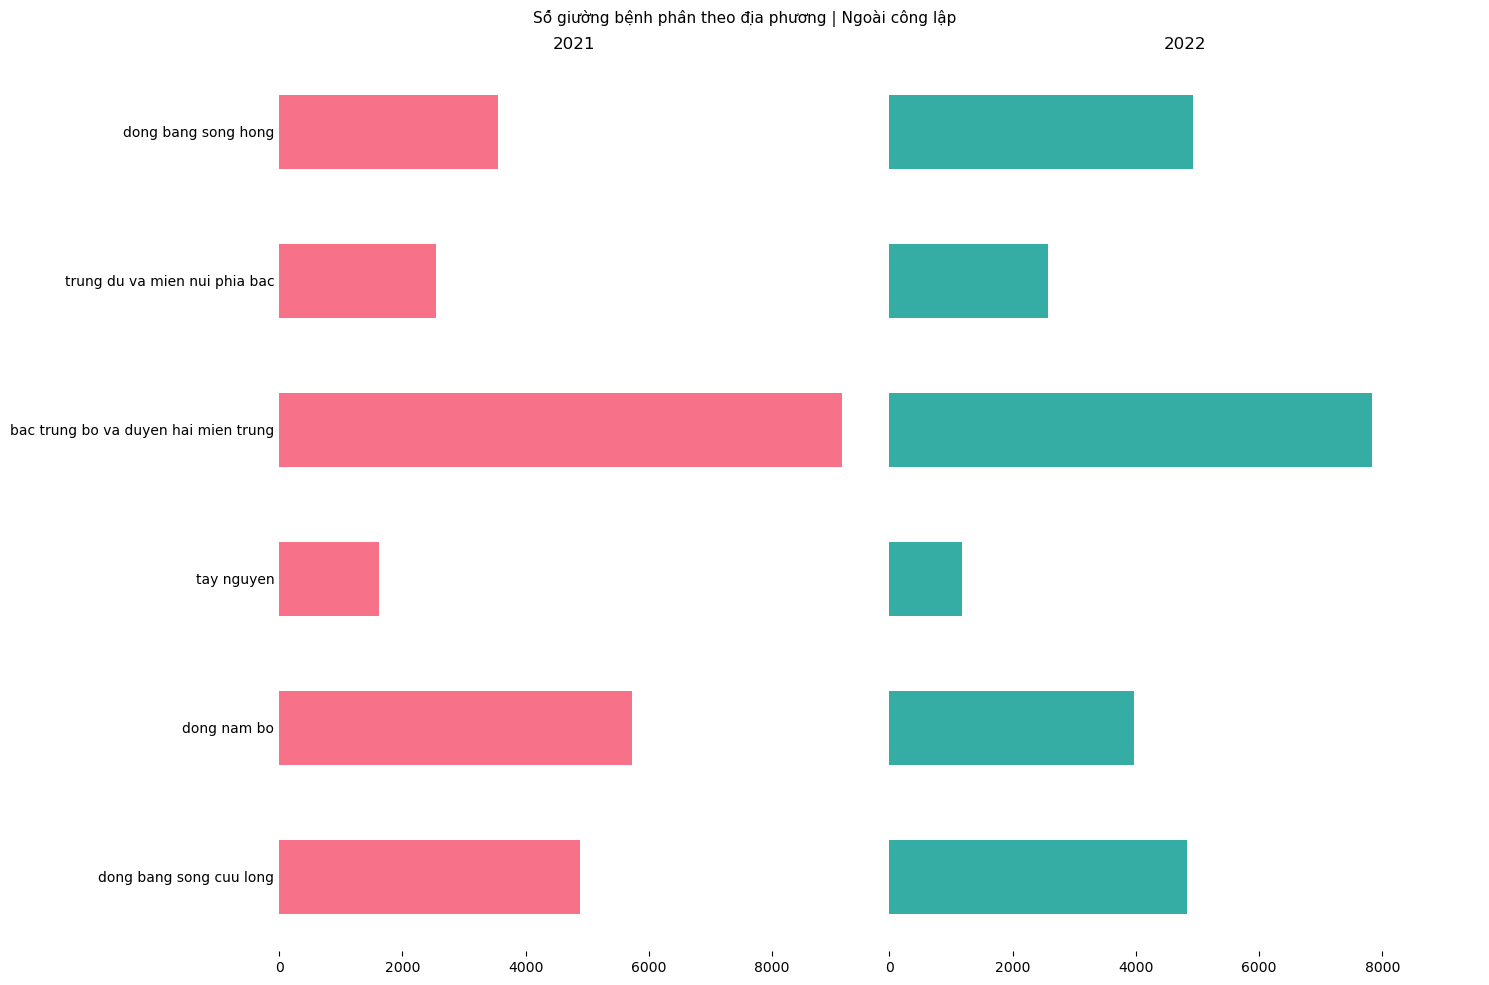

              2021         2022
count    51.000000    35.000000
mean    538.078431   723.542857
std     691.993550   876.497017
min      20.000000    30.000000
25%     130.000000   153.500000
50%     300.000000   400.000000
75%     605.000000   910.000000
max    3273.000000  3656.000000
              2021         2022
count     6.000000     6.000000
mean   4573.666667  4220.666667
std    2684.860046  2273.745515
min    1621.000000  1186.000000
25%    2793.250000  2926.750000
50%    4215.000000  4400.000000
75%    5512.250000  4906.500000
max    9127.000000  7827.000000
2021:
thanh hoa, BTBDHMT: 3273.0
dong nai, DNB: 2385.0
binh duong, DNB: 2360.0
nghe an, BTBDHMT: 2331.0
hai phong, DBSH: 1785.0
------------------------------
2022:
thanh hoa, BTBDHMT: 3656.0
thai binh, DBSH: 3457.0
binh duong, DNB: 2149.0
nghe an, BTBDHMT: 1861.0
dong nai, DNB: 1600.0
------------------------------


In [51]:
for sub in giuongbenh.Sub_Feature.unique()[:-1]:
    report(giuongbenh, sub, ['2021', '2022'], str(features[12]) + " | " + str(sub))

## Create metrics

In [91]:
lst_features = [sc_0, sc_3, sc_4, sc_5, sc_6, sc_8, sc_10, sc_11, sc_12, sc_13, sc_14]

In [109]:
mean_lst = [np.nanmean(i, axis=1) for i in lst_features]

In [111]:
def find_nan_indices(lst):
    nan_indices = [idx for idx, arr in enumerate(lst) if np.all(np.isnan(arr))]
    return nan_indices

find_nan_indices(mean_lst)

[]

In [114]:
import pickle
with open('yte_corr.pkl', 'wb') as f:
    pickle.dump(mean_lst, f)

In [359]:
name_col = ["sc_0", "sc_3", "sc_4", "sc_5", "sc_6", "sc_8", "sc_10", "sc_11", "sc_12", "sc_13", "sc_14"]
yte_metric = pd.DataFrame(features_mean).transpose()
yte_metric.columns = name_col
yte_metric['Province'] = province_name_preprocessed

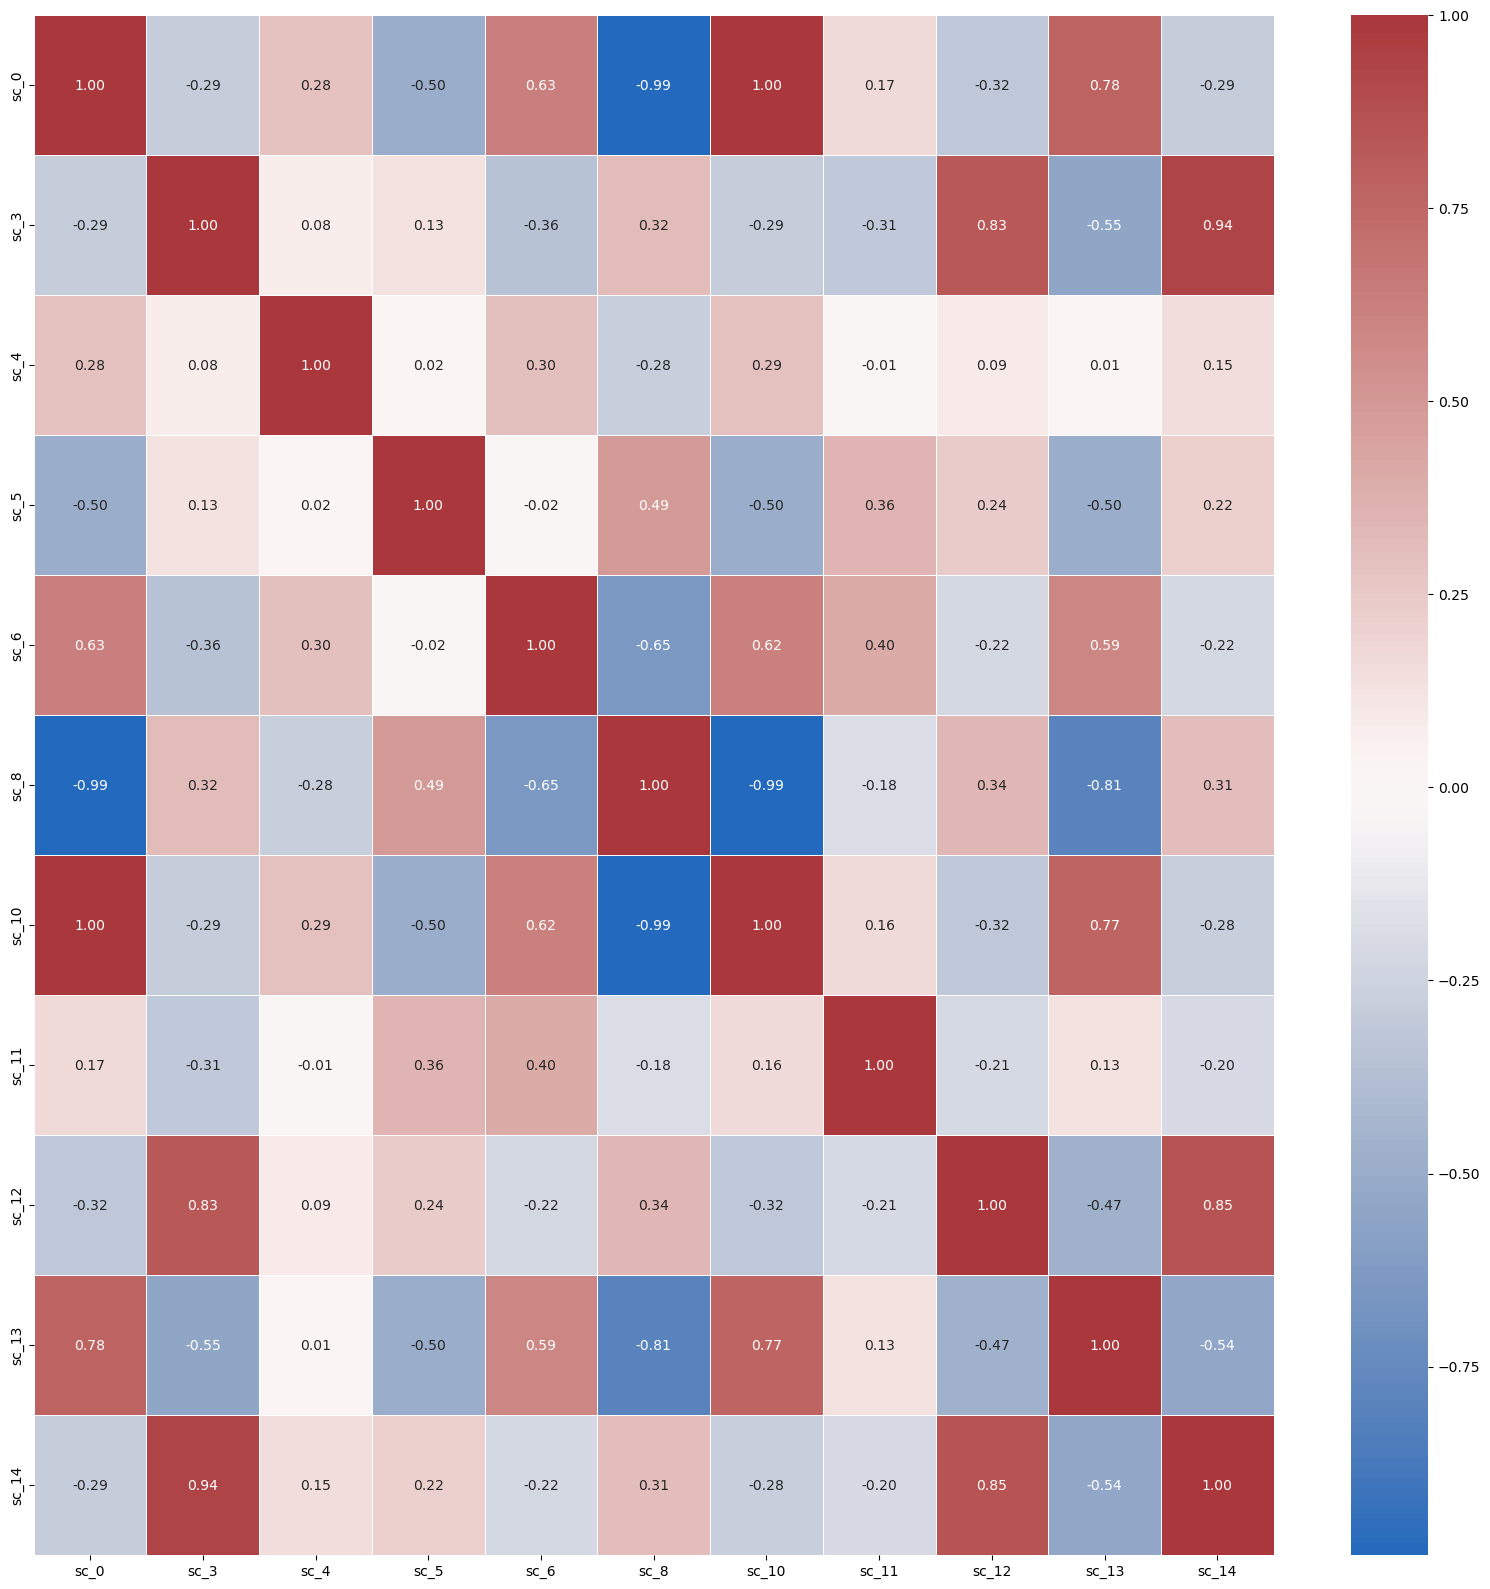

In [360]:
from sklearn.preprocessing import MinMaxScaler
col_fea = yte_metric.columns.drop('Province')
# lvt_metric_df[col_fea] = lvt_metric_df[col_fea] * weights
scaler = MinMaxScaler(feature_range=(0, 1))
yte_metric[col_fea] = scaler.fit_transform(yte_metric[col_fea])

plt.figure(figsize=(20,20))
sns.heatmap(yte_metric[col_fea].corr(), cmap=sns.color_palette("vlag", as_cmap=True), annot=True, fmt='.2f', linewidths=.5)
plt.show()

In [365]:
for i in features[[0,3,4,5,6,8,10,11,12,13,14]]:
    print(i)

Tỷ suất chết của trẻ em dưới 1 tuổi phân theo địa phương chia theo Địa phương và Năm
Số người nhiễm HIVAIDS phân theo địa phương chia theo Địa phương, Năm và Phân tổ
Tỷ lệ tăng dân số phân theo địa phương chia theo Tỉnh-Thành phố và Năm
Tỷ lệ trẻ em dưới 05 tuổi được đăng ký khai sinh phân theo địa phương chia theo Tỉnh-Thành phố và Năm
Tổng tỷ suất sinh phân theo địa phương chia theo Địa phương và Năm
Tuổi thọ trung bình tính từ lúc sinh phân theo địa phương chia theo Tỉnh-Thành phố và Năm
Tỷ suất chết của trẻ em dưới 5 tuổi phân theo địa phương chia theo Tỉnh-Thành phố và Năm
Tỷ lệ trẻ em dưới một tuổi được tiêm chủng đầy đủ các loại vắc xin phân theo địa phương chia theo Địa phương và Năm
Số giường bệnh phân theo địa phương
Tỷ lệ trẻ em dưới 5 tuổi bị suy dinh dưỡng phân theo địa phương chia

## Create features for model

In [213]:
# hdi = pd.read_csv("C:/Users/acer/Downloads/hdi.csv")
# hdi.drop(columns=['Sơ bộ 2022'], inplace=True)
# hdi.rename(columns={hdi.columns[0]: "Province"}, inplace=True)
# hdi['Province'] = hdi['Province'].apply(lambda x: clean_province(x))
# hdi['Province'] = hdi['Province'].apply(lambda x: unidecode(x).lower())
# hdi['Province'] = hdi['Province'].str.replace('tp. ho chi minh', 'tp.ho chi minh')
# # print(df.Province.tolist())
# hdi['Province'] = hdi['Province'].str.replace("nam dinh\(\*\)", 'nam dinh')
# # df[df.Province == 'nam dinh(*)']['Province'] = 'nam dinh'
# hdi = hdi[hdi.Province.isin(province_name_preprocessed)]
# hdi.to_csv("hdi_target.csv", index=False)

C:\Users\acer\AppData\Local\Temp\ipykernel_13632\4217539924.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  hdi['Province'] = hdi['Province'].str.replace('tp. ho chi minh', 'tp.ho chi minh')
C:\Users\acer\AppData\Local\Temp\ipykernel_13632\4217539924.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  hdi['Province'] = hdi['Province'].str.replace("nam dinh\(\*\)", 'nam dinh')


In [31]:
hdi = pd.read_csv("hdi_target.csv")

In [33]:
hdi_target = hdi[['2018', '2019', '2020', '2021']].values.copy()
hdi_target = np.char.replace(hdi_target.astype(str), ',', '.').astype(float)

In [266]:
features_model = [sc_0_model, sc_3_model, sc_4_model, sc_5_model, sc_6_model, sc_8_model, sc_10_model, sc_11_model, sc_12_model, sc_13_model, sc_14_model, hdi_target]

In [55]:
import pickle
with open("yte_features.pkl", 'rb') as f:
    yte_list = pickle.load(f)
yte_list = yte_list[:-1]

with open("clcc_features.pkl", 'rb') as f:
    clcc_list = pickle.load(f)

with open("lvt_features.pkl", 'rb') as f:
    lvt_list = pickle.load(f)

In [ ]:
map_column = {
    0: 'tỷ suất chết của trẻ em dưới 1 tuổi',
    1: 'số người nhiễm hivaids',
    2: 'tỷ lệ tăng dân số',
    3: 'tỷ lệ trẻ em dưới 5 tuổi được đăng ký khai sinh',
    4: 'tổng tỷ suất sinh',
    5: 'tuổi thọ trung bình',
    6: 'tỷ suất chết của trẻ em dưới 5 tuổi',
    7: 'tỷ lệ trẻ em dưới 1 tuổi được tiêm chủng',
    8: 'số giường bệnh',
    9: 'tỷ lệ trẻ em dưới 5 tuổi bị suy dinh dưỡng',
    10: 'số bác sĩ',
    11: 'nuoc_vs_p',
    12: 'dien_p',
    13: 'dtns_p',
    14: 'hoxi_p',
    15: 'bietchu_p',
    16: 'nha_kien_co',
    17: 'nha_ban_kien_co',
    18: 'nha_thieu_kien_co',
    19: 'nha_don_so',
    20: 'tỷ lệ nhập cư',
    21: 'tỷ lệ xuất cư',
    22: 'năng suất lao động',
    23: 'tỷ lệ thiếu việc làm trong độ tuổi lao động',
    24: 'thu nhập bình quân đầu người 1 tháng theo giá hiện thành',
    25: 'lực lượng lao động từ 15 tuổi trở lên',
    26: 'thu nhập bình quân đầu người 1 tháng theo giá hiện thành phân theo trung bình 5 nhóm',
    27: 'tỷ lệ lao động từ 15 tuổi trở lên qua đào tạo',
    28: 'tỷ lệ hộ nghèo',
    29: 'tỷ lệ thất nghiệp trong độ tuổi lao động',
    30: 'gini',
    31: 'tỷ lệ lao động có việc làm phi chính thức',
    32: 'thu nhập bình quân đầu người 1 tháng (nhóm thấp nhất)',
    33: 'thu nhập bình quân 1 lao động đang làm việc',
    34: 'thu nhập bình quân đầu người 1 tháng (nhóm cao nhất)',
    35: 'số lao động có việc làm trong nền kinh tế'
}

In [56]:
combined = yte_list + clcc_list + lvt_list

In [57]:
yte_mean = [np.mean(i, axis=1) for i in yte_list]
clcc_mean = [np.mean(i, axis=1) for i in clcc_list]
lvt_mean = [np.mean(i, axis=1) for i in lvt_list]
combined_mean = [yte_mean, clcc_mean, lvt_mean]

In [59]:
len(yte_mean), len(clcc_mean), len(lvt_mean)

(11, 9, 16)

In [54]:
def find_nan_indices(yte_mean):
    nan_indices = [idx for idx, arr in enumerate(yte_mean) if np.all(np.isnan(arr))]
    return nan_indices

print(find_nan_indices(yte_mean))
print(find_nan_indices(clcc_mean))
print(find_nan_indices(lvt_mean))

[3, 8, 9]
[1, 5, 6, 7, 8]
[1, 2, 3, 7, 8, 9, 11, 15]


In [53]:
yte_mean[8]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [5]:
import numpy as np
import pandas as pd
stack_data = []
for year in range(0,4):
    stack_by_year = []
    for fea in combined:
        stack_by_year.append(fea[:,year])
    result = np.column_stack(stack_by_year)
    stack_data.append(result)
stack_data = np.array(stack_data)
stack_data = np.concatenate(stack_data, axis=0)

In [48]:
stack_data

array([[9.8000e+00, 0.0000e+00, 2.2300e+00, ..., 6.3951e+03, 1.4225e+01,
               nan],
       [1.2400e+01, 0.0000e+00, 1.3600e+00, ..., 4.7166e+03, 7.9390e+00,
               nan],
       [1.2300e+01, 0.0000e+00, 3.0500e+00, ..., 6.0847e+03, 1.2489e+01,
               nan],
       ...,
       [1.2270e+01, 3.0840e+03, 9.3000e-01, ..., 4.8162e+03, 5.9120e+00,
        5.9687e+02],
       [1.1510e+01, 1.7520e+03, 5.5000e-01, ..., 5.1124e+03, 6.1690e+00,
        4.7071e+02],
       [1.0350e+01, 3.6040e+03, 1.2400e+00, ..., 5.3414e+03, 7.2920e+00,
        5.8326e+02]])

In [54]:
import pickle
with open("features_training_model.pkl", 'wb') as f:
    pickle.dump(stack_data, f)

In [55]:
with open("features_training_model.pkl", 'rb') as f:
    loaded_list = pickle.load(f)